**2018 Kaggle Machine Learning and Data Science Survey**
* The 2018 Kaggle Machine Learning and Data Science Survey finished with 23,859 responses.

In [1]:
# Import Python packages
import numpy as np 
import pandas as pd 
import os
import math
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core import display as ICD
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)
pd.set_option('display.max_columns', 5000)
base_dir = '../data/'
fileName = '2018_multipleChoiceResponses.csv'

filePath = os.path.join(base_dir,fileName)
survey2_expanded = pd.read_csv(filePath) 

responsesOnly_expanded = survey2_expanded[1:]
surveySchemaPath = os.path.join(base_dir,'2018_SurveySchema.csv')
surveySchema = pd.read_csv(surveySchemaPath)

multipleChoicePath = os.path.join(base_dir,'2018_multipleChoiceResponses.csv')
multipleChoice = pd.read_csv(multipleChoicePath)

Average Time Spent Taking the Survey: 15-20 Minutes


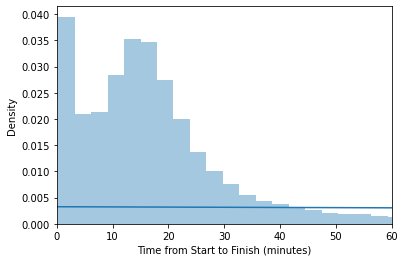

In [2]:
responsesOnly = multipleChoice[1:]
columns_to_keep2 = ['Time from Start to Finish (seconds)']
responsesOnlyDuration = responsesOnly[columns_to_keep2]
responsesOnlyDuration = pd.to_numeric(responsesOnlyDuration['Time from Start to Finish (seconds)'], errors='coerce')
responsesOnlyDuration = responsesOnlyDuration/60
responsesOnlyDuration = pd.DataFrame(responsesOnlyDuration)
responsesOnlyDuration.columns = ['Time from Start to Finish (minutes)']
responsesOnlyDuration = responsesOnlyDuration['Time from Start to Finish (minutes)']
sns.distplot(responsesOnlyDuration,bins=5000).set(xlim=(0, 60))
print('Average Time Spent Taking the Survey: 15-20 Minutes')

In [3]:
print('Total Number of Responses: ',responsesOnly_expanded.shape[0])
responsesOnly_expanded2 = responsesOnly_expanded
responsesOnly_expanded2 = pd.to_numeric(responsesOnly_expanded2['Time from Start to Finish (seconds)'], errors='coerce')
responsesOnly_expanded2 = pd.DataFrame(responsesOnly_expanded2)
responsesOnly_expanded2 = responsesOnly_expanded2[responsesOnly_expanded2['Time from Start to Finish (seconds)'] > 299]  
print('Total Number of Respondents That Took More Than 5 Minutes: ',responsesOnly_expanded2.shape[0])

Total Number of Responses:  23859
Total Number of Respondents That Took More Than 5 Minutes:  20120


**A Quick EDA of All 50 Questions:**

In [4]:
def plotHistogram(data,questionPart,actualQuestion,lowerlimit,upperlimit,lowerY,upperY):
    q = data[questionPart][beginAt:]
    q = pd.DataFrame(q)
    q = q.fillna(0)
    q = q.apply(pd.to_numeric, errors='ignore')
    plot = sns.distplot(q,bins=numBins).set(xlim=(lowerlimit, upperlimit),ylim=(lowerY,upperY),title=(actualQuestion+'\n\n\n'),xlabel = ('% of Time'), ylabel = ('% of Respondents'))
    
def plotViolin(data,questionPart,actualQuestion,lowerlimit,upperlimit,lowerY,upperY,color):
    q = data[questionPart][beginAt:]
    q = pd.DataFrame(q)
    q = q.fillna(0)
    q = q.apply(pd.to_numeric, errors='ignore')
    plot = sns.violinplot(x=q,color=color,label=actualQuestion).set(xlim=(lowerlimit, upperlimit),xlabel = ('% of Time'), ylabel = ('% of Respondents')) 

def plotMultipleChoice(questionNumber,data,data2, title,yAxisTitle,begin,end):
    print(questionNumber,':',data2[questionNumber][0])
    counts = data[questionNumber].value_counts()
    countsDf = pd.DataFrame(counts)
    trace1 = go.Bar(
                    x = countsDf.index,
                    y = countsDf[questionNumber][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf.index)
    data = [trace1]
    layout = go.Layout(barmode = "group",title=title, yaxis= dict(title=yAxisTitle),showlegend=False)
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)

In [5]:
def plotMultipleChoice5MultipleSelections(data,data2,title,yAxisTitle,questionNumber,questionPart1,questionPart2,questionPart3,questionPart4,questionPart5):
    print(questionNumber,':',data2[questionPart1][0])            
    counts1 = data[questionPart1].value_counts()
    countsDf1 = pd.DataFrame(counts1)
    counts2 = data[questionPart2].value_counts()
    countsDf2 = pd.DataFrame(counts2)
    counts3 = data[questionPart3].value_counts()
    countsDf3 = pd.DataFrame(counts3)
    counts4 = data[questionPart4].value_counts()
    countsDf4 = pd.DataFrame(counts4)
    counts5 = data[questionPart5].value_counts()
    countsDf5 = pd.DataFrame(counts5)
    
    trace1 = go.Bar(
                    x = countsDf1.index,
                    y = countsDf1[questionPart1][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf1.index)
    trace2 = go.Bar(
                    x = countsDf2.index,
                    y = countsDf2[questionPart2][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf2.index)    
    trace3 = go.Bar(
                    x = countsDf3.index,
                    y = countsDf3[questionPart3][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf3.index)   
    trace4 = go.Bar(
                    x = countsDf4.index,
                    y = countsDf4[questionPart4][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf4.index)   
    trace5 = go.Bar(
                    x = countsDf5.index,
                    y = countsDf5[questionPart5][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf5.index)   

    data = [trace1,trace2,trace3,trace4,trace5]
    layout = go.Layout(barmode = "group",title=title, yaxis= dict(title=yAxisTitle),showlegend=False)
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)    
    
def plotMultipleChoice6MultipleSelections(data,data2,title,yAxisTitle,questionNumber,questionPart1,questionPart2,questionPart3,questionPart4,questionPart5,questionPart6):
    print(questionNumber,':',data2[questionPart1][0])            
    counts1 = data[questionPart1].value_counts()
    countsDf1 = pd.DataFrame(counts1)
    counts2 = data[questionPart2].value_counts()
    countsDf2 = pd.DataFrame(counts2)
    counts3 = data[questionPart3].value_counts()
    countsDf3 = pd.DataFrame(counts3)
    counts4 = data[questionPart4].value_counts()
    countsDf4 = pd.DataFrame(counts4)
    counts5 = data[questionPart5].value_counts()
    countsDf5 = pd.DataFrame(counts5)
    counts6 = data[questionPart6].value_counts()
    countsDf6 = pd.DataFrame(counts6)
    
    trace1 = go.Bar(
                    x = countsDf1.index,
                    y = countsDf1[questionPart1][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf1.index)
    trace2 = go.Bar(
                    x = countsDf2.index,
                    y = countsDf2[questionPart2][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf2.index)    
    trace3 = go.Bar(
                    x = countsDf3.index,
                    y = countsDf3[questionPart3][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf3.index)   
    trace4 = go.Bar(
                    x = countsDf4.index,
                    y = countsDf4[questionPart4][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf4.index)   
    trace5 = go.Bar(
                    x = countsDf5.index,
                    y = countsDf5[questionPart5][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf5.index)   
    trace6 = go.Bar(
                    x = countsDf6.index,
                    y = countsDf6[questionPart6][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf6.index)   

    data = [trace1,trace2,trace3,trace4,trace5,trace6]
    layout = go.Layout(barmode = "group",title=title, yaxis= dict(title=yAxisTitle),showlegend=False)
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)    
    

def plotMultipleChoice7MultipleSelections(data,data2,title,yAxisTitle,questionNumber,questionPart1,questionPart2,questionPart3,questionPart4,questionPart5,questionPart6,questionPart7):
    print(questionNumber,':',data2[questionPart1][0])
    counts1 = data[questionPart1].value_counts()
    countsDf1 = pd.DataFrame(counts1)
    counts2 = data[questionPart2].value_counts()
    countsDf2 = pd.DataFrame(counts2)
    counts3 = data[questionPart3].value_counts()
    countsDf3 = pd.DataFrame(counts3)
    counts4 = data[questionPart4].value_counts()
    countsDf4 = pd.DataFrame(counts4)
    counts5 = data[questionPart5].value_counts()
    countsDf5 = pd.DataFrame(counts5)
    counts6 = data[questionPart6].value_counts()
    countsDf6 = pd.DataFrame(counts6)
    counts7 = data[questionPart7].value_counts()
    countsDf7 = pd.DataFrame(counts7)
    trace1 = go.Bar(
                    x = countsDf1.index,
                    y = countsDf1[questionPart1][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf1.index)
    trace2 = go.Bar(
                    x = countsDf2.index,
                    y = countsDf2[questionPart2][begin:end],
                   name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf2.index)    
    trace3 = go.Bar(
                    x = countsDf3.index,
                    y = countsDf3[questionPart3][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf3.index)   
    trace4 = go.Bar(
                    x = countsDf4.index,
                    y = countsDf4[questionPart4][begin:end],
                   name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf4.index)   
    trace5 = go.Bar(
                    x = countsDf5.index,
                    y = countsDf5[questionPart5][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf5.index)   
    trace6 = go.Bar(
                    x = countsDf6.index,
                    y = countsDf6[questionPart6][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf6.index)   
    trace7 = go.Bar(
                    x = countsDf7.index,
                    y = countsDf7[questionPart7][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf7.index)   
    data = [trace1,trace2,trace3,trace4,trace5,trace6,trace7]
    layout = go.Layout(barmode = "group",title=title, yaxis= dict(title=yAxisTitle),showlegend=False)
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)

    
    
def plotMultipleChoice8MultipleSelections(data,data2,title,yAxisTitle,questionNumber,questionPart1,questionPart2,questionPart3,questionPart4,questionPart5,questionPart6,questionPart7,questionPart8):
    print(questionNumber,':',data2[questionNumber][0])    
    counts1 = data[questionPart1].value_counts()
    countsDf1 = pd.DataFrame(counts1)
    counts2 = data[questionPart2].value_counts()
    countsDf2 = pd.DataFrame(counts2)
    counts3 = data[questionPart3].value_counts()
    countsDf3 = pd.DataFrame(counts3)
    counts4 = data[questionPart4].value_counts()
    countsDf4 = pd.DataFrame(counts4)
    counts5 = data[questionPart5].value_counts()
    countsDf5 = pd.DataFrame(counts5)
    counts6 = data[questionPart6].value_counts()
    countsDf6 = pd.DataFrame(counts6)
    counts7 = data[questionPart7].value_counts()
    countsDf7 = pd.DataFrame(counts7)
    counts8 = data[questionPart8].value_counts()
    countsDf8 = pd.DataFrame(counts8)

    
    trace1 = go.Bar(
                    x = countsDf1.index,
                    y = countsDf1[questionPart1][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf1.index)
    trace2 = go.Bar(
                    x = countsDf2.index,
                    y = countsDf2[questionPart2][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf2.index)    
    trace3 = go.Bar(
                    x = countsDf3.index,
                    y = countsDf3[questionPart3][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf3.index)   
    trace4 = go.Bar(
                    x = countsDf4.index,
                    y = countsDf4[questionPart4][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf4.index)   
    trace5 = go.Bar(
                    x = countsDf5.index,
                    y = countsDf5[questionPart5][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf5.index)   
    trace6 = go.Bar(
                    x = countsDf6.index,
                    y = countsDf6[questionPart6][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf6.index)   
    trace7 = go.Bar(
                    x = countsDf7.index,
                    y = countsDf7[questionPart7][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf7.index)   
    trace8 = go.Bar(
                    x = countsDf8.index,
                    y = countsDf8[questionPart8][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf8.index)   
    
    data = [trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8]
    layout = go.Layout(barmode = "group",title=title, yaxis= dict(title=yAxisTitle),showlegend=False)
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)    
    
    
def plotMultipleChoice11MultipleSelections(data,data2,title,yAxisTitle,questionNumber,questionPart1,questionPart2,questionPart3,questionPart4,questionPart5,questionPart6,questionPart7,questionPart8,questionPart9,questionPart10,questionPart11):
    print(questionNumber,':',data2[questionPart1][0])
    counts1 = data[questionPart1].value_counts()
    countsDf1 = pd.DataFrame(counts1)
    counts2 = data[questionPart2].value_counts()
    countsDf2 = pd.DataFrame(counts2)
    counts3 = data[questionPart3].value_counts()
    countsDf3 = pd.DataFrame(counts3)
    counts4 = data[questionPart4].value_counts()
    countsDf4 = pd.DataFrame(counts4)
    counts5 = data[questionPart5].value_counts()
    countsDf5 = pd.DataFrame(counts5)
    counts6 = data[questionPart6].value_counts()
    countsDf6 = pd.DataFrame(counts6)
    counts7 = data[questionPart7].value_counts()
    countsDf7 = pd.DataFrame(counts7)
    counts8 = data[questionPart8].value_counts()
    countsDf8 = pd.DataFrame(counts8)
    counts9 = data[questionPart9].value_counts()
    countsDf9 = pd.DataFrame(counts9)
    counts10 = data[questionPart10].value_counts()
    countsDf10 = pd.DataFrame(counts10)
    counts11 = data[questionPart11].value_counts()
    countsDf11 = pd.DataFrame(counts11)  
    
    trace1 = go.Bar(
                    x = countsDf1.index,
                    y = countsDf1[questionPart1][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf1.index)
    trace2 = go.Bar(
                    x = countsDf2.index,
                    y = countsDf2[questionPart2][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf2.index)    
    trace3 = go.Bar(
                    x = countsDf3.index,
                    y = countsDf3[questionPart3][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf3.index)   
    trace4 = go.Bar(
                    x = countsDf4.index,
                    y = countsDf4[questionPart4][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf4.index)   
    trace5 = go.Bar(
                    x = countsDf5.index,
                    y = countsDf5[questionPart5][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf5.index)   
    trace6 = go.Bar(
                    x = countsDf6.index,
                    y = countsDf6[questionPart6][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf6.index)   
    trace7 = go.Bar(
                    x = countsDf7.index,
                    y = countsDf7[questionPart7][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf7.index)   
    trace8 = go.Bar(
                    x = countsDf8.index,
                    y = countsDf8[questionPart8][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf8.index)   
    trace9 = go.Bar(
                    x = countsDf9.index,
                    y = countsDf9[questionPart9][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf9.index)   
    trace10 = go.Bar(
                    x = countsDf10.index,
                    y = countsDf10[questionPart10][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf10.index)
    
    trace11 = go.Bar(
                    x = countsDf11.index,
                    y = countsDf11[questionPart11][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf11.index) 
    
    data = [trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11]
    layout = go.Layout(barmode = "group",title=title, yaxis= dict(title=yAxisTitle),showlegend=False)
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)


def plotMultipleChoice12MultipleSelections(data,data2,title,yAxisTitle,questionNumber,questionPart1,questionPart2,questionPart3,questionPart4,questionPart5,questionPart6,questionPart7,questionPart8,questionPart9,questionPart10,questionPart11,questionPart12):
    print(questionNumber,':',data2[questionPart1][0])     
    counts1 = data[questionPart1].value_counts()
    countsDf1 = pd.DataFrame(counts1)
    counts2 = data[questionPart2].value_counts()
    countsDf2 = pd.DataFrame(counts2)
    counts3 = data[questionPart3].value_counts()
    countsDf3 = pd.DataFrame(counts3)
    counts4 = data[questionPart4].value_counts()
    countsDf4 = pd.DataFrame(counts4)
    counts5 = data[questionPart5].value_counts()
    countsDf5 = pd.DataFrame(counts5)
    counts6 = data[questionPart6].value_counts()
    countsDf6 = pd.DataFrame(counts6)
    counts7 = data[questionPart7].value_counts()
    countsDf7 = pd.DataFrame(counts7)
    counts8 = data[questionPart8].value_counts()
    countsDf8 = pd.DataFrame(counts8)
    counts9 = data[questionPart9].value_counts()
    countsDf9 = pd.DataFrame(counts9)
    counts10 = data[questionPart10].value_counts()
    countsDf10 = pd.DataFrame(counts10)
    counts11 = data[questionPart11].value_counts()
    countsDf11 = pd.DataFrame(counts11)  
    counts12 = data[questionPart12].value_counts()
    countsDf12 = pd.DataFrame(counts12)  
    
    trace1 = go.Bar(
                    x = countsDf1.index,
                    y = countsDf1[questionPart1][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf1.index)
    trace2 = go.Bar(
                    x = countsDf2.index,
                    y = countsDf2[questionPart2][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf2.index)    
    trace3 = go.Bar(
                    x = countsDf3.index,
                    y = countsDf3[questionPart3][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf3.index)   
    trace4 = go.Bar(
                    x = countsDf4.index,
                    y = countsDf4[questionPart4][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf4.index)   
    trace5 = go.Bar(
                    x = countsDf5.index,
                    y = countsDf5[questionPart5][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf5.index)   
    trace6 = go.Bar(
                    x = countsDf6.index,
                    y = countsDf6[questionPart6][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf6.index)   
    trace7 = go.Bar(
                    x = countsDf7.index,
                    y = countsDf7[questionPart7][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf7.index)   
    trace8 = go.Bar(
                    x = countsDf8.index,
                    y = countsDf8[questionPart8][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf8.index)   
    trace9 = go.Bar(
                    x = countsDf9.index,
                    y = countsDf9[questionPart9][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf9.index)   
    trace10 = go.Bar(
                    x = countsDf10.index,
                    y = countsDf10[questionPart10][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf10.index)
    trace11 = go.Bar(
                    x = countsDf11.index,
                    y = countsDf11[questionPart11][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf11.index) 

    trace12 = go.Bar(
                    x = countsDf12.index,
                    y = countsDf12[questionPart12][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf12.index) 
    
    
    data = [trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12]
    layout = go.Layout(barmode = "group",title=title, yaxis= dict(title=yAxisTitle),showlegend=False)
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)    
    
    
    
def plotMultipleChoice13MultipleSelections(data,data2,title,yAxisTitle,questionNumber,questionPart1,questionPart2,questionPart3,questionPart4,questionPart5,questionPart6,questionPart7,questionPart8,questionPart9,questionPart10,questionPart11,questionPart12,questionPart13):
    print(questionNumber,':',data2[questionPart1][0])        
    counts1 = data[questionPart1].value_counts()
    countsDf1 = pd.DataFrame(counts1)
    counts2 = data[questionPart2].value_counts()
    countsDf2 = pd.DataFrame(counts2)
    counts3 = data[questionPart3].value_counts()
    countsDf3 = pd.DataFrame(counts3)
    counts4 = data[questionPart4].value_counts()
    countsDf4 = pd.DataFrame(counts4)
    counts5 = data[questionPart5].value_counts()
    countsDf5 = pd.DataFrame(counts5)
    counts6 = data[questionPart6].value_counts()
    countsDf6 = pd.DataFrame(counts6)
    counts7 = data[questionPart7].value_counts()
    countsDf7 = pd.DataFrame(counts7)
    counts8 = data[questionPart8].value_counts()
    countsDf8 = pd.DataFrame(counts8)
    counts9 = data[questionPart9].value_counts()
    countsDf9 = pd.DataFrame(counts9)
    counts10 = data[questionPart10].value_counts()
    countsDf10 = pd.DataFrame(counts10)
    counts11 = data[questionPart11].value_counts()
    countsDf11 = pd.DataFrame(counts11)  
    counts12 = data[questionPart12].value_counts()
    countsDf12 = pd.DataFrame(counts12)  
    counts13 = data[questionPart13].value_counts()
    countsDf13 = pd.DataFrame(counts13)  
    
    trace1 = go.Bar(
                    x = countsDf1.index,
                    y = countsDf1[questionPart1][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf1.index)
    trace2 = go.Bar(
                    x = countsDf2.index,
                    y = countsDf2[questionPart2][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf2.index)    
    trace3 = go.Bar(
                    x = countsDf3.index,
                    y = countsDf3[questionPart3][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf3.index)   
    trace4 = go.Bar(
                    x = countsDf4.index,
                    y = countsDf4[questionPart4][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf4.index)   
    trace5 = go.Bar(
                    x = countsDf5.index,
                    y = countsDf5[questionPart5][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf5.index)   
    trace6 = go.Bar(
                    x = countsDf6.index,
                    y = countsDf6[questionPart6][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf6.index)   
    trace7 = go.Bar(
                    x = countsDf7.index,
                    y = countsDf7[questionPart7][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf7.index)   
    trace8 = go.Bar(
                    x = countsDf8.index,
                    y = countsDf8[questionPart8][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf8.index)   
    trace9 = go.Bar(
                    x = countsDf9.index,
                    y = countsDf9[questionPart9][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf9.index)   
    trace10 = go.Bar(
                    x = countsDf10.index,
                    y = countsDf10[questionPart10][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf10.index)
    trace11 = go.Bar(
                    x = countsDf11.index,
                    y = countsDf11[questionPart11][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf11.index) 

    trace12 = go.Bar(
                    x = countsDf12.index,
                    y = countsDf12[questionPart12][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf12.index) 
    trace13 = go.Bar(
                    x = countsDf13.index,
                    y = countsDf13[questionPart13][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf13.index) 

    data = [trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12,trace13]
    layout = go.Layout(barmode = "group",title=title, yaxis= dict(title=yAxisTitle),showlegend=False)
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)
    
def plotMultipleChoice15MultipleSelections(data,data2,title,yAxisTitle,questionNumber,questionPart1,questionPart2,questionPart3,questionPart4,questionPart5,questionPart6,questionPart7,questionPart8,questionPart9,questionPart10,questionPart11,questionPart12,questionPart13,questionPart14,questionPart15):
    print(questionNumber,':',data2[questionPart1][0])    
    counts1 = data[questionPart1].value_counts()
    countsDf1 = pd.DataFrame(counts1)
    counts2 = data[questionPart2].value_counts()
    countsDf2 = pd.DataFrame(counts2)
    counts3 = data[questionPart3].value_counts()
    countsDf3 = pd.DataFrame(counts3)
    counts4 = data[questionPart4].value_counts()
    countsDf4 = pd.DataFrame(counts4)
    counts5 = data[questionPart5].value_counts()
    countsDf5 = pd.DataFrame(counts5)
    counts6 = data[questionPart6].value_counts()
    countsDf6 = pd.DataFrame(counts6)
    counts7 = data[questionPart7].value_counts()
    countsDf7 = pd.DataFrame(counts7)
    counts8 = data[questionPart8].value_counts()
    countsDf8 = pd.DataFrame(counts8)
    counts9 = data[questionPart9].value_counts()
    countsDf9 = pd.DataFrame(counts9)
    counts10 = data[questionPart10].value_counts()
    countsDf10 = pd.DataFrame(counts10)
    counts11 = data[questionPart11].value_counts()
    countsDf11 = pd.DataFrame(counts11)
    counts12 = data[questionPart12].value_counts()
    countsDf12 = pd.DataFrame(counts12)
    counts13 = data[questionPart13].value_counts()
    countsDf13 = pd.DataFrame(counts13)
    counts14 = data[questionPart14].value_counts()
    countsDf14 = pd.DataFrame(counts14)
    counts15 = data[questionPart15].value_counts()
    countsDf15 = pd.DataFrame(counts15)    
    
    trace1 = go.Bar(
                    x = countsDf1.index,
                    y = countsDf1[questionPart1][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf1.index)
    trace2 = go.Bar(
                    x = countsDf2.index,
                    y = countsDf2[questionPart2][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf2.index)    
    trace3 = go.Bar(
                    x = countsDf3.index,
                    y = countsDf3[questionPart3][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf3.index)   
    trace4 = go.Bar(
                    x = countsDf4.index,
                    y = countsDf4[questionPart4][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf4.index)   
    trace5 = go.Bar(
                    x = countsDf5.index,
                    y = countsDf5[questionPart5][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf5.index)   
    trace6 = go.Bar(
                    x = countsDf6.index,
                    y = countsDf6[questionPart6][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf6.index)   
    trace7 = go.Bar(
                    x = countsDf7.index,
                    y = countsDf7[questionPart7][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf7.index)   
    trace8 = go.Bar(
                    x = countsDf8.index,
                    y = countsDf8[questionPart8][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf8.index)   
    trace9 = go.Bar(
                    x = countsDf9.index,
                    y = countsDf9[questionPart9][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf9.index)   
    trace10 = go.Bar(
                    x = countsDf10.index,
                    y = countsDf10[questionPart10][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf10.index)
    
    trace11 = go.Bar(
                    x = countsDf11.index,
                    y = countsDf11[questionPart11][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf11.index) 
    trace12 = go.Bar(
                    x = countsDf12.index,
                    y = countsDf12[questionPart12][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf12.index) 
    trace13 = go.Bar(
                    x = countsDf13.index,
                    y = countsDf13[questionPart13][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf13.index) 
    trace14 = go.Bar(
                    x = countsDf14.index,
                    y = countsDf14[questionPart14][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf14.index) 
    trace15 = go.Bar(
                    x = countsDf15.index,
                    y = countsDf15[questionPart15][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf15.index) 
    
    data = [trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12,trace13,trace14,trace15]
    layout = go.Layout(barmode = "group",title=title, yaxis= dict(title=yAxisTitle),showlegend=False)
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)

    
    
def plotMultipleChoice16MultipleSelections(data,data2,title,yAxisTitle,questionNumber,questionPart1,questionPart2,questionPart3,questionPart4,questionPart5,questionPart6,questionPart7,questionPart8,questionPart9,questionPart10,questionPart11,questionPart12,questionPart13,questionPart14,questionPart15,questionPart16):
    print(questionNumber,':',data2[questionPart1][0])            
    counts1 = data[questionPart1].value_counts()
    countsDf1 = pd.DataFrame(counts1)
    counts2 = data[questionPart2].value_counts()
    countsDf2 = pd.DataFrame(counts2)
    counts3 = data[questionPart3].value_counts()
    countsDf3 = pd.DataFrame(counts3)
    counts4 = data[questionPart4].value_counts()
    countsDf4 = pd.DataFrame(counts4)
    counts5 = data[questionPart5].value_counts()
    countsDf5 = pd.DataFrame(counts5)
    counts6 = data[questionPart6].value_counts()
    countsDf6 = pd.DataFrame(counts6)
    counts7 = data[questionPart7].value_counts()
    countsDf7 = pd.DataFrame(counts7)
    counts8 = data[questionPart8].value_counts()
    countsDf8 = pd.DataFrame(counts8)
    counts9 = data[questionPart9].value_counts()
    countsDf9 = pd.DataFrame(counts9)
    counts10 = data[questionPart10].value_counts()
    countsDf10 = pd.DataFrame(counts10)
    counts11 = data[questionPart11].value_counts()
    countsDf11 = pd.DataFrame(counts11)  
    counts12 = data[questionPart12].value_counts()
    countsDf12 = pd.DataFrame(counts12)  
    counts13 = data[questionPart13].value_counts()
    countsDf13 = pd.DataFrame(counts13)  
    counts14 = data[questionPart14].value_counts()
    countsDf14 = pd.DataFrame(counts14)  
    counts15 = data[questionPart15].value_counts()
    countsDf15 = pd.DataFrame(counts15) 
    counts16 = data[questionPart16].value_counts()
    countsDf16 = pd.DataFrame(counts16) 
    
    trace1 = go.Bar(
                    x = countsDf1.index,
                    y = countsDf1[questionPart1][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf1.index)
    trace2 = go.Bar(
                    x = countsDf2.index,
                    y = countsDf2[questionPart2][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf2.index)    
    trace3 = go.Bar(
                    x = countsDf3.index,
                    y = countsDf3[questionPart3][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf3.index)   
    trace4 = go.Bar(
                    x = countsDf4.index,
                    y = countsDf4[questionPart4][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf4.index)   
    trace5 = go.Bar(
                    x = countsDf5.index,
                    y = countsDf5[questionPart5][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf5.index)   
    trace6 = go.Bar(
                    x = countsDf6.index,
                    y = countsDf6[questionPart6][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf6.index)   
    trace7 = go.Bar(
                    x = countsDf7.index,
                    y = countsDf7[questionPart7][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf7.index)   
    trace8 = go.Bar(
                    x = countsDf8.index,
                    y = countsDf8[questionPart8][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf8.index)   
    trace9 = go.Bar(
                    x = countsDf9.index,
                    y = countsDf9[questionPart9][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf9.index)   
    trace10 = go.Bar(
                    x = countsDf10.index,
                    y = countsDf10[questionPart10][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf10.index)
    trace11 = go.Bar(
                    x = countsDf11.index,
                    y = countsDf11[questionPart11][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf11.index) 

    trace12 = go.Bar(
                    x = countsDf12.index,
                    y = countsDf12[questionPart12][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf12.index) 
    trace13 = go.Bar(
                    x = countsDf13.index,
                    y = countsDf13[questionPart13][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf13.index) 
    trace14 = go.Bar(
                    x = countsDf14.index,
                    y = countsDf14[questionPart14][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf14.index) 
    trace15 = go.Bar(
                    x = countsDf15.index,
                    y = countsDf15[questionPart15][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf15.index) 
    trace16 = go.Bar(
                    x = countsDf16.index,
                    y = countsDf16[questionPart16][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf16.index) 
    
    data = [trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12,trace13,trace14,trace15,trace16]
    layout = go.Layout(barmode = "group",title=title, yaxis= dict(title=yAxisTitle),showlegend=False)
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)    
    
    
    
    
def plotMultipleChoice18MultipleSelections(data,data2,title,yAxisTitle,questionNumber,questionPart1,questionPart2,questionPart3,questionPart4,questionPart5,questionPart6,questionPart7,questionPart8,questionPart9,questionPart10,questionPart11,questionPart12,questionPart13,questionPart14,questionPart15,questionPart16,questionPart17,questionPart18):
    print(questionNumber,':',data2[questionPart1][0])        
    counts1 = data[questionPart1].value_counts()
    countsDf1 = pd.DataFrame(counts1)
    counts2 = data[questionPart2].value_counts()
    countsDf2 = pd.DataFrame(counts2)
    counts3 = data[questionPart3].value_counts()
    countsDf3 = pd.DataFrame(counts3)
    counts4 = data[questionPart4].value_counts()
    countsDf4 = pd.DataFrame(counts4)
    counts5 = data[questionPart5].value_counts()
    countsDf5 = pd.DataFrame(counts5)
    counts6 = data[questionPart6].value_counts()
    countsDf6 = pd.DataFrame(counts6)
    counts7 = data[questionPart7].value_counts()
    countsDf7 = pd.DataFrame(counts7)
    counts8 = data[questionPart8].value_counts()
    countsDf8 = pd.DataFrame(counts8)
    counts9 = data[questionPart9].value_counts()
    countsDf9 = pd.DataFrame(counts9)
    counts10 = data[questionPart10].value_counts()
    countsDf10 = pd.DataFrame(counts10)
    counts11 = data[questionPart11].value_counts()
    countsDf11 = pd.DataFrame(counts11)  
    counts12 = data[questionPart12].value_counts()
    countsDf12 = pd.DataFrame(counts12)  
    counts13 = data[questionPart13].value_counts()
    countsDf13 = pd.DataFrame(counts13)  
    counts14 = data[questionPart14].value_counts()
    countsDf14 = pd.DataFrame(counts14)  
    counts15 = data[questionPart15].value_counts()
    countsDf15 = pd.DataFrame(counts15)  
    counts16 = data[questionPart16].value_counts()
    countsDf16 = pd.DataFrame(counts16)  
    counts17 = data[questionPart17].value_counts()
    countsDf17 = pd.DataFrame(counts17)  
    counts18 = data[questionPart18].value_counts()
    countsDf18 = pd.DataFrame(counts18)  
        
    trace1 = go.Bar(
                    x = countsDf1.index,
                    y = countsDf1[questionPart1][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf1.index)
    trace2 = go.Bar(
                    x = countsDf2.index,
                    y = countsDf2[questionPart2][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf2.index)    
    trace3 = go.Bar(
                    x = countsDf3.index,
                    y = countsDf3[questionPart3][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf3.index)   
    trace4 = go.Bar(
                    x = countsDf4.index,
                    y = countsDf4[questionPart4][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf4.index)   
    trace5 = go.Bar(
                    x = countsDf5.index,
                    y = countsDf5[questionPart5][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf5.index)   
    trace6 = go.Bar(
                    x = countsDf6.index,
                    y = countsDf6[questionPart6][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf6.index)   
    trace7 = go.Bar(
                    x = countsDf7.index,
                    y = countsDf7[questionPart7][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf7.index)   
    trace8 = go.Bar(
                    x = countsDf8.index,
                    y = countsDf8[questionPart8][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf8.index)   
    trace9 = go.Bar(
                    x = countsDf9.index,
                    y = countsDf9[questionPart9][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf9.index)   
    trace10 = go.Bar(
                    x = countsDf10.index,
                    y = countsDf10[questionPart10][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf10.index)
    trace11 = go.Bar(
                    x = countsDf11.index,
                    y = countsDf11[questionPart11][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf11.index) 

    trace12 = go.Bar(
                    x = countsDf12.index,
                    y = countsDf12[questionPart12][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf12.index) 
    trace13 = go.Bar(
                    x = countsDf13.index,
                    y = countsDf13[questionPart13][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf13.index) 
    trace14 = go.Bar(
                    x = countsDf14.index,
                    y = countsDf14[questionPart14][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf14.index) 
    trace15 = go.Bar(
                    x = countsDf15.index,
                    y = countsDf15[questionPart15][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf15.index) 
    trace16 = go.Bar(
                    x = countsDf16.index,
                    y = countsDf16[questionPart16][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf16.index) 
    trace17 = go.Bar(
                    x = countsDf17.index,
                    y = countsDf17[questionPart17][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf17.index) 
    trace18 = go.Bar(
                    x = countsDf18.index,
                    y = countsDf18[questionPart18][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf18.index)  
    
    data = [trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12,trace13,trace14,trace15,trace16,trace17,trace18]
    layout = go.Layout(barmode = "group",title=title, yaxis= dict(title=yAxisTitle),showlegend=False)
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)
    


def plotMultipleChoice19MultipleSelections(data,data2,title,yAxisTitle,questionNumber,questionPart1,questionPart2,questionPart3,questionPart4,questionPart5,questionPart6,questionPart7,questionPart8,questionPart9,questionPart10,questionPart11,questionPart12,questionPart13,questionPart14,questionPart15,questionPart16,questionPart17,questionPart18,questionPart19):
    print(questionNumber,':',data2[questionPart1][0])        
    counts1 = data[questionPart1].value_counts()
    countsDf1 = pd.DataFrame(counts1)
    counts2 = data[questionPart2].value_counts()
    countsDf2 = pd.DataFrame(counts2)
    counts3 = data[questionPart3].value_counts()
    countsDf3 = pd.DataFrame(counts3)
    counts4 = data[questionPart4].value_counts()
    countsDf4 = pd.DataFrame(counts4)
    counts5 = data[questionPart5].value_counts()
    countsDf5 = pd.DataFrame(counts5)
    counts6 = data[questionPart6].value_counts()
    countsDf6 = pd.DataFrame(counts6)
    counts7 = data[questionPart7].value_counts()
    countsDf7 = pd.DataFrame(counts7)
    counts8 = data[questionPart8].value_counts()
    countsDf8 = pd.DataFrame(counts8)
    counts9 = data[questionPart9].value_counts()
    countsDf9 = pd.DataFrame(counts9)
    counts10 = data[questionPart10].value_counts()
    countsDf10 = pd.DataFrame(counts10)
    counts11 = data[questionPart11].value_counts()
    countsDf11 = pd.DataFrame(counts11)  
    counts12 = data[questionPart12].value_counts()
    countsDf12 = pd.DataFrame(counts12)  
    counts13 = data[questionPart13].value_counts()
    countsDf13 = pd.DataFrame(counts13)  
    counts14 = data[questionPart14].value_counts()
    countsDf14 = pd.DataFrame(counts14)  
    counts15 = data[questionPart15].value_counts()
    countsDf15 = pd.DataFrame(counts15)  
    counts16 = data[questionPart16].value_counts()
    countsDf16 = pd.DataFrame(counts16)  
    counts17 = data[questionPart17].value_counts()
    countsDf17 = pd.DataFrame(counts17)  
    counts18 = data[questionPart18].value_counts()
    countsDf18 = pd.DataFrame(counts18)  
    counts19 = data[questionPart19].value_counts()
    countsDf19 = pd.DataFrame(counts19) 
    
    trace1 = go.Bar(
                    x = countsDf1.index,
                    y = countsDf1[questionPart1][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf1.index)
    trace2 = go.Bar(
                    x = countsDf2.index,
                    y = countsDf2[questionPart2][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf2.index)    
    trace3 = go.Bar(
                    x = countsDf3.index,
                    y = countsDf3[questionPart3][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf3.index)   
    trace4 = go.Bar(
                    x = countsDf4.index,
                    y = countsDf4[questionPart4][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf4.index)   
    trace5 = go.Bar(
                    x = countsDf5.index,
                    y = countsDf5[questionPart5][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf5.index)   
    trace6 = go.Bar(
                    x = countsDf6.index,
                    y = countsDf6[questionPart6][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf6.index)   
    trace7 = go.Bar(
                    x = countsDf7.index,
                    y = countsDf7[questionPart7][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf7.index)   
    trace8 = go.Bar(
                    x = countsDf8.index,
                    y = countsDf8[questionPart8][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf8.index)   
    trace9 = go.Bar(
                    x = countsDf9.index,
                    y = countsDf9[questionPart9][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf9.index)   
    trace10 = go.Bar(
                    x = countsDf10.index,
                    y = countsDf10[questionPart10][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf10.index)
    trace11 = go.Bar(
                    x = countsDf11.index,
                    y = countsDf11[questionPart11][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf11.index) 

    trace12 = go.Bar(
                    x = countsDf12.index,
                    y = countsDf12[questionPart12][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf12.index) 
    trace13 = go.Bar(
                    x = countsDf13.index,
                    y = countsDf13[questionPart13][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf13.index) 
    trace14 = go.Bar(
                    x = countsDf14.index,
                    y = countsDf14[questionPart14][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf14.index) 
    trace15 = go.Bar(
                    x = countsDf15.index,
                    y = countsDf15[questionPart15][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf15.index) 
    trace16 = go.Bar(
                    x = countsDf16.index,
                    y = countsDf16[questionPart16][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf16.index) 
    trace17 = go.Bar(
                    x = countsDf17.index,
                    y = countsDf17[questionPart17][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf17.index) 
    trace18 = go.Bar(
                    x = countsDf18.index,
                    y = countsDf18[questionPart18][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf18.index)  
    trace19 = go.Bar(
                    x = countsDf19.index,
                    y = countsDf19[questionPart19][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf19.index)  
    
    data = [trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12,trace13,trace14,trace15,trace16,trace17,trace18,trace19]
    layout = go.Layout(barmode = "group",title=title, yaxis= dict(title=yAxisTitle),showlegend=False)
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)

def plotMultipleChoice20MultipleSelections(data,data2,title,yAxisTitle,questionNumber,questionPart1,questionPart2,questionPart3,questionPart4,questionPart5,questionPart6,questionPart7,questionPart8,questionPart9,questionPart10,questionPart11,questionPart12,questionPart13,questionPart14,questionPart15,questionPart16,questionPart17,questionPart18,questionPart19,questionPart20):
    print(questionNumber,':',data2[questionPart1][0])            
    counts1 = data[questionPart1].value_counts()
    countsDf1 = pd.DataFrame(counts1)
    counts2 = data[questionPart2].value_counts()
    countsDf2 = pd.DataFrame(counts2)
    counts3 = data[questionPart3].value_counts()
    countsDf3 = pd.DataFrame(counts3)
    counts4 = data[questionPart4].value_counts()
    countsDf4 = pd.DataFrame(counts4)
    counts5 = data[questionPart5].value_counts()
    countsDf5 = pd.DataFrame(counts5)
    counts6 = data[questionPart6].value_counts()
    countsDf6 = pd.DataFrame(counts6)
    counts7 = data[questionPart7].value_counts()
    countsDf7 = pd.DataFrame(counts7)
    counts8 = data[questionPart8].value_counts()
    countsDf8 = pd.DataFrame(counts8)
    counts9 = data[questionPart9].value_counts()
    countsDf9 = pd.DataFrame(counts9)
    counts10 = data[questionPart10].value_counts()
    countsDf10 = pd.DataFrame(counts10)
    counts11 = data[questionPart11].value_counts()
    countsDf11 = pd.DataFrame(counts11)  
    counts12 = data[questionPart12].value_counts()
    countsDf12 = pd.DataFrame(counts12)  
    counts13 = data[questionPart13].value_counts()
    countsDf13 = pd.DataFrame(counts13)  
    counts14 = data[questionPart14].value_counts()
    countsDf14 = pd.DataFrame(counts14)  
    counts15 = data[questionPart15].value_counts()
    countsDf15 = pd.DataFrame(counts15)  
    counts16 = data[questionPart16].value_counts()
    countsDf16 = pd.DataFrame(counts16)  
    counts17 = data[questionPart17].value_counts()
    countsDf17 = pd.DataFrame(counts17)  
    counts18 = data[questionPart18].value_counts()
    countsDf18 = pd.DataFrame(counts18)  
    counts19 = data[questionPart19].value_counts()
    countsDf19 = pd.DataFrame(counts19) 
    counts20 = data[questionPart20].value_counts()
    countsDf20 = pd.DataFrame(counts20) 
    
    trace1 = go.Bar(
                    x = countsDf1.index,
                    y = countsDf1[questionPart1][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf1.index)
    trace2 = go.Bar(
                    x = countsDf2.index,
                    y = countsDf2[questionPart2][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf2.index)    
    trace3 = go.Bar(
                    x = countsDf3.index,
                    y = countsDf3[questionPart3][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf3.index)   
    trace4 = go.Bar(
                    x = countsDf4.index,
                    y = countsDf4[questionPart4][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf4.index)   
    trace5 = go.Bar(
                    x = countsDf5.index,
                    y = countsDf5[questionPart5][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf5.index)   
    trace6 = go.Bar(
                    x = countsDf6.index,
                    y = countsDf6[questionPart6][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf6.index)   
    trace7 = go.Bar(
                    x = countsDf7.index,
                    y = countsDf7[questionPart7][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf7.index)   
    trace8 = go.Bar(
                    x = countsDf8.index,
                    y = countsDf8[questionPart8][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf8.index)   
    trace9 = go.Bar(
                    x = countsDf9.index,
                    y = countsDf9[questionPart9][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf9.index)   
    trace10 = go.Bar(
                    x = countsDf10.index,
                    y = countsDf10[questionPart10][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf10.index)
    trace11 = go.Bar(
                    x = countsDf11.index,
                    y = countsDf11[questionPart11][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf11.index) 

    trace12 = go.Bar(
                    x = countsDf12.index,
                    y = countsDf12[questionPart12][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf12.index) 
    trace13 = go.Bar(
                    x = countsDf13.index,
                    y = countsDf13[questionPart13][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf13.index) 
    trace14 = go.Bar(
                    x = countsDf14.index,
                    y = countsDf14[questionPart14][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf14.index) 
    trace15 = go.Bar(
                    x = countsDf15.index,
                    y = countsDf15[questionPart15][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf15.index) 
    trace16 = go.Bar(
                    x = countsDf16.index,
                    y = countsDf16[questionPart16][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf16.index) 
    trace17 = go.Bar(
                    x = countsDf17.index,
                    y = countsDf17[questionPart17][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf17.index) 
    trace18 = go.Bar(
                    x = countsDf18.index,
                    y = countsDf18[questionPart18][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf18.index)  
    trace19 = go.Bar(
                    x = countsDf19.index,
                    y = countsDf19[questionPart19][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf19.index)  
    trace20 = go.Bar(
                    x = countsDf20.index,
                    y = countsDf20[questionPart20][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf20.index)  
    
    data = [trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12,trace13,trace14,trace15,trace16,trace17,trace18,trace19,trace20]
    layout = go.Layout(barmode = "group",title=title, yaxis= dict(title=yAxisTitle),showlegend=False)
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)

    

def plotMultipleChoice22MultipleSelections(data,data2,title,yAxisTitle,questionNumber,questionPart1,questionPart2,questionPart3,questionPart4,questionPart5,questionPart6,questionPart7,questionPart8,questionPart9,questionPart10,questionPart11,questionPart12,questionPart13,questionPart14,questionPart15,questionPart16,questionPart17,questionPart18,questionPart19,questionPart20,questionPart21,questionPart22):
    print(questionNumber,':',data2[questionPart1][0])     
    counts1 = data[questionPart1].value_counts()
    countsDf1 = pd.DataFrame(counts1)
    counts2 = data[questionPart2].value_counts()
    countsDf2 = pd.DataFrame(counts2)
    counts3 = data[questionPart3].value_counts()
    countsDf3 = pd.DataFrame(counts3)
    counts4 = data[questionPart4].value_counts()
    countsDf4 = pd.DataFrame(counts4)
    counts5 = data[questionPart5].value_counts()
    countsDf5 = pd.DataFrame(counts5)
    counts6 = data[questionPart6].value_counts()
    countsDf6 = pd.DataFrame(counts6)
    counts7 = data[questionPart7].value_counts()
    countsDf7 = pd.DataFrame(counts7)
    counts8 = data[questionPart8].value_counts()
    countsDf8 = pd.DataFrame(counts8)
    counts9 = data[questionPart9].value_counts()
    countsDf9 = pd.DataFrame(counts9)
    counts10 = data[questionPart10].value_counts()
    countsDf10 = pd.DataFrame(counts10)
    counts11 = data[questionPart11].value_counts()
    countsDf11 = pd.DataFrame(counts11)  
    counts12 = data[questionPart12].value_counts()
    countsDf12 = pd.DataFrame(counts12)  
    counts13 = data[questionPart13].value_counts()
    countsDf13 = pd.DataFrame(counts13)  
    counts14 = data[questionPart14].value_counts()
    countsDf14 = pd.DataFrame(counts14)  
    counts15 = data[questionPart15].value_counts()
    countsDf15 = pd.DataFrame(counts15)  
    counts16 = data[questionPart16].value_counts()
    countsDf16 = pd.DataFrame(counts16)  
    counts17 = data[questionPart17].value_counts()
    countsDf17 = pd.DataFrame(counts17)  
    counts18 = data[questionPart18].value_counts()
    countsDf18 = pd.DataFrame(counts18)  
    counts19 = data[questionPart19].value_counts()
    countsDf19 = pd.DataFrame(counts19) 
    counts20 = data[questionPart20].value_counts()
    countsDf20 = pd.DataFrame(counts20) 
    counts21 = data[questionPart21].value_counts()
    countsDf21 = pd.DataFrame(counts21) 
    counts22 = data[questionPart22].value_counts()
    countsDf22 = pd.DataFrame(counts22) 
   
    trace1 = go.Bar(
                    x = countsDf1.index,
                    y = countsDf1[questionPart1][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf1.index)
    trace2 = go.Bar(
                    x = countsDf2.index,
                    y = countsDf2[questionPart2][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf2.index)    
    trace3 = go.Bar(
                    x = countsDf3.index,
                    y = countsDf3[questionPart3][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf3.index)   
    trace4 = go.Bar(
                    x = countsDf4.index,
                    y = countsDf4[questionPart4][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf4.index)   
    trace5 = go.Bar(
                    x = countsDf5.index,
                    y = countsDf5[questionPart5][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf5.index)   
    trace6 = go.Bar(
                    x = countsDf6.index,
                    y = countsDf6[questionPart6][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf6.index)   
    trace7 = go.Bar(
                    x = countsDf7.index,
                    y = countsDf7[questionPart7][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf7.index)   
    trace8 = go.Bar(
                    x = countsDf8.index,
                    y = countsDf8[questionPart8][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf8.index)   
    trace9 = go.Bar(
                    x = countsDf9.index,
                    y = countsDf9[questionPart9][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf9.index)   
    trace10 = go.Bar(
                    x = countsDf10.index,
                    y = countsDf10[questionPart10][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf10.index)
    trace11 = go.Bar(
                    x = countsDf11.index,
                    y = countsDf11[questionPart11][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf11.index) 

    trace12 = go.Bar(
                    x = countsDf12.index,
                    y = countsDf12[questionPart12][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf12.index) 
    trace13 = go.Bar(
                    x = countsDf13.index,
                    y = countsDf13[questionPart13][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf13.index) 
    trace14 = go.Bar(
                    x = countsDf14.index,
                    y = countsDf14[questionPart14][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf14.index) 
    trace15 = go.Bar(
                    x = countsDf15.index,
                    y = countsDf15[questionPart15][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf15.index) 
    trace16 = go.Bar(
                    x = countsDf16.index,
                    y = countsDf16[questionPart16][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf16.index) 
    trace17 = go.Bar(
                    x = countsDf17.index,
                    y = countsDf17[questionPart17][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf17.index) 
    trace18 = go.Bar(
                    x = countsDf18.index,
                    y = countsDf18[questionPart18][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf18.index)  
    trace19 = go.Bar(
                    x = countsDf19.index,
                    y = countsDf19[questionPart19][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf19.index)  
    trace20 = go.Bar(
                    x = countsDf20.index,
                    y = countsDf20[questionPart20][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf20.index)  
    trace21 = go.Bar(
                    x = countsDf21.index,
                    y = countsDf21[questionPart21][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf21.index)  
    trace22 = go.Bar(
                    x = countsDf22.index,
                    y = countsDf22[questionPart22][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf22.index)  
    
    data = [trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12,trace13,trace14,trace15,trace16,trace17,trace18,trace19,trace20,trace21,trace22]
    layout = go.Layout(barmode = "group",title=title, yaxis= dict(title=yAxisTitle),showlegend=False)
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)    

def plotMultipleChoice25MultipleSelections(data,data2,title,yAxisTitle,questionNumber,questionPart1,questionPart2,questionPart3,questionPart4,questionPart5,questionPart6,questionPart7,questionPart8,questionPart9,questionPart10,questionPart11,questionPart12,questionPart13,questionPart14,questionPart15,questionPart16,questionPart17,questionPart18,questionPart19,questionPart20,questionPart21,questionPart22,questionPart23,questionPart24,questionPart25):
    print(questionNumber,':',data2[questionPart1][0])       
    counts1 = data[questionPart1].value_counts()
    countsDf1 = pd.DataFrame(counts1)
    counts2 = data[questionPart2].value_counts()
    countsDf2 = pd.DataFrame(counts2)
    counts3 = data[questionPart3].value_counts()
    countsDf3 = pd.DataFrame(counts3)
    counts4 = data[questionPart4].value_counts()
    countsDf4 = pd.DataFrame(counts4)
    counts5 = data[questionPart5].value_counts()
    countsDf5 = pd.DataFrame(counts5)
    counts6 = data[questionPart6].value_counts()
    countsDf6 = pd.DataFrame(counts6)
    counts7 = data[questionPart7].value_counts()
    countsDf7 = pd.DataFrame(counts7)
    counts8 = data[questionPart8].value_counts()
    countsDf8 = pd.DataFrame(counts8)
    counts9 = data[questionPart9].value_counts()
    countsDf9 = pd.DataFrame(counts9)
    counts10 = data[questionPart10].value_counts()
    countsDf10 = pd.DataFrame(counts10)
    counts11 = data[questionPart11].value_counts()
    countsDf11 = pd.DataFrame(counts11)  
    counts12 = data[questionPart12].value_counts()
    countsDf12 = pd.DataFrame(counts12)  
    counts13 = data[questionPart13].value_counts()
    countsDf13 = pd.DataFrame(counts13)  
    counts14 = data[questionPart14].value_counts()
    countsDf14 = pd.DataFrame(counts14)  
    counts15 = data[questionPart15].value_counts()
    countsDf15 = pd.DataFrame(counts15)  
    counts16 = data[questionPart16].value_counts()
    countsDf16 = pd.DataFrame(counts16)  
    counts17 = data[questionPart17].value_counts()
    countsDf17 = pd.DataFrame(counts17)  
    counts18 = data[questionPart18].value_counts()
    countsDf18 = pd.DataFrame(counts18)  
    counts19 = data[questionPart19].value_counts()
    countsDf19 = pd.DataFrame(counts19) 
    counts20 = data[questionPart20].value_counts()
    countsDf20 = pd.DataFrame(counts20)   
    counts21 = data[questionPart21].value_counts()
    countsDf21 = pd.DataFrame(counts21) 
    counts22 = data[questionPart22].value_counts()
    countsDf22 = pd.DataFrame(counts22) 
    counts23 = data[questionPart23].value_counts()
    countsDf23 = pd.DataFrame(counts23) 
    counts24 = data[questionPart24].value_counts()
    countsDf24 = pd.DataFrame(counts24) 
    counts25 = data[questionPart25].value_counts()
    countsDf25 = pd.DataFrame(counts25) 


    trace1 = go.Bar(
                    x = countsDf1.index,
                    y = countsDf1[questionPart1][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf1.index)
    trace2 = go.Bar(
                    x = countsDf2.index,
                    y = countsDf2[questionPart2][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf2.index)    
    trace3 = go.Bar(
                    x = countsDf3.index,
                    y = countsDf3[questionPart3][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf3.index)   
    trace4 = go.Bar(
                    x = countsDf4.index,
                    y = countsDf4[questionPart4][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf4.index)   
    trace5 = go.Bar(
                    x = countsDf5.index,
                    y = countsDf5[questionPart5][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf5.index)   
    trace6 = go.Bar(
                    x = countsDf6.index,
                    y = countsDf6[questionPart6][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf6.index)   
    trace7 = go.Bar(
                    x = countsDf7.index,
                    y = countsDf7[questionPart7][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf7.index)   
    trace8 = go.Bar(
                    x = countsDf8.index,
                    y = countsDf8[questionPart8][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf8.index)   
    trace9 = go.Bar(
                    x = countsDf9.index,
                    y = countsDf9[questionPart9][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf9.index)   
    trace10 = go.Bar(
                    x = countsDf10.index,
                    y = countsDf10[questionPart10][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf10.index)
    trace11 = go.Bar(
                    x = countsDf11.index,
                    y = countsDf11[questionPart11][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf11.index) 

    trace12 = go.Bar(
                    x = countsDf12.index,
                    y = countsDf12[questionPart12][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf12.index) 
    trace13 = go.Bar(
                    x = countsDf13.index,
                    y = countsDf13[questionPart13][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf13.index) 
    trace14 = go.Bar(
                    x = countsDf14.index,
                    y = countsDf14[questionPart14][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf14.index) 
    trace15 = go.Bar(
                    x = countsDf15.index,
                    y = countsDf15[questionPart15][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf15.index) 
    trace16 = go.Bar(
                    x = countsDf16.index,
                    y = countsDf16[questionPart16][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf16.index) 
    trace17 = go.Bar(
                    x = countsDf17.index,
                    y = countsDf17[questionPart17][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf17.index) 
    trace18 = go.Bar(
                    x = countsDf18.index,
                    y = countsDf18[questionPart18][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf18.index)  
    trace19 = go.Bar(
                    x = countsDf19.index,
                    y = countsDf19[questionPart19][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf19.index)  
    trace20 = go.Bar(
                    x = countsDf20.index,
                    y = countsDf20[questionPart20][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf20.index)  
    trace21 = go.Bar(
                    x = countsDf21.index,
                    y = countsDf21[questionPart21][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf21.index)  
    trace22 = go.Bar(
                    x = countsDf22.index,
                    y = countsDf22[questionPart22][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf22.index)  
    trace23 = go.Bar(
                    x = countsDf23.index,
                    y = countsDf23[questionPart23][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf23.index)  
    trace24 = go.Bar(
                    x = countsDf24.index,
                    y = countsDf24[questionPart24][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf24.index)  
    trace25 = go.Bar(
                    x = countsDf25.index,
                    y = countsDf25[questionPart25][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf25.index)  

    
    data = [trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12,trace13,trace14,trace15,trace16,trace17,trace18,trace19,trace20,trace21,trace22,trace23,trace24,trace25]
    layout = go.Layout(barmode = "group",title=title, yaxis= dict(title=yAxisTitle),showlegend=False)
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)    
    
    
def plotMultipleChoice28MultipleSelections(data,data2,title,yAxisTitle,questionNumber,questionPart1,questionPart2,questionPart3,questionPart4,questionPart5,questionPart6,questionPart7,questionPart8,questionPart9,questionPart10,questionPart11,questionPart12,questionPart13,questionPart14,questionPart15,questionPart16,questionPart17,questionPart18,questionPart19,questionPart20,questionPart21,questionPart22,questionPart23,questionPart24,questionPart25,questionPart26,questionPart27,questionPart28):
    print(questionNumber,':',data2[questionPart1][0])    
    counts1 = data[questionPart1].value_counts()
    countsDf1 = pd.DataFrame(counts1)
    counts2 = data[questionPart2].value_counts()
    countsDf2 = pd.DataFrame(counts2)
    counts3 = data[questionPart3].value_counts()
    countsDf3 = pd.DataFrame(counts3)
    counts4 = data[questionPart4].value_counts()
    countsDf4 = pd.DataFrame(counts4)
    counts5 = data[questionPart5].value_counts()
    countsDf5 = pd.DataFrame(counts5)
    counts6 = data[questionPart6].value_counts()
    countsDf6 = pd.DataFrame(counts6)
    counts7 = data[questionPart7].value_counts()
    countsDf7 = pd.DataFrame(counts7)
    counts8 = data[questionPart8].value_counts()
    countsDf8 = pd.DataFrame(counts8)
    counts9 = data[questionPart9].value_counts()
    countsDf9 = pd.DataFrame(counts9)
    counts10 = data[questionPart10].value_counts()
    countsDf10 = pd.DataFrame(counts10)
    counts11 = data[questionPart11].value_counts()
    countsDf11 = pd.DataFrame(counts11)  
    counts12 = data[questionPart12].value_counts()
    countsDf12 = pd.DataFrame(counts12)  
    counts13 = data[questionPart13].value_counts()
    countsDf13 = pd.DataFrame(counts13)  
    counts14 = data[questionPart14].value_counts()
    countsDf14 = pd.DataFrame(counts14)  
    counts15 = data[questionPart15].value_counts()
    countsDf15 = pd.DataFrame(counts15)  
    counts16 = data[questionPart16].value_counts()
    countsDf16 = pd.DataFrame(counts16)  
    counts17 = data[questionPart17].value_counts()
    countsDf17 = pd.DataFrame(counts17)  
    counts18 = data[questionPart18].value_counts()
    countsDf18 = pd.DataFrame(counts18)  
    counts19 = data[questionPart19].value_counts()
    countsDf19 = pd.DataFrame(counts19) 
    counts20 = data[questionPart20].value_counts()
    countsDf20 = pd.DataFrame(counts20)   
    counts21 = data[questionPart21].value_counts()
    countsDf21 = pd.DataFrame(counts21) 
    counts22 = data[questionPart22].value_counts()
    countsDf22 = pd.DataFrame(counts22) 
    counts23 = data[questionPart23].value_counts()
    countsDf23 = pd.DataFrame(counts23) 
    counts24 = data[questionPart24].value_counts()
    countsDf24 = pd.DataFrame(counts24) 
    counts25 = data[questionPart25].value_counts()
    countsDf25 = pd.DataFrame(counts25) 
    counts26 = data[questionPart26].value_counts()
    countsDf26 = pd.DataFrame(counts26) 
    counts27 = data[questionPart27].value_counts()
    countsDf27 = pd.DataFrame(counts27) 
    counts28 = data[questionPart28].value_counts()
    countsDf28 = pd.DataFrame(counts28) 
    #counts29 = data[questionPart29].value_counts()
    #countsDf29 = pd.DataFrame(counts29) 

    trace1 = go.Bar(
                    x = countsDf1.index,
                    y = countsDf1[questionPart1][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf1.index)
    trace2 = go.Bar(
                    x = countsDf2.index,
                    y = countsDf2[questionPart2][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf2.index)    
    trace3 = go.Bar(
                    x = countsDf3.index,
                    y = countsDf3[questionPart3][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf3.index)   
    trace4 = go.Bar(
                    x = countsDf4.index,
                    y = countsDf4[questionPart4][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf4.index)   
    trace5 = go.Bar(
                    x = countsDf5.index,
                    y = countsDf5[questionPart5][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf5.index)   
    trace6 = go.Bar(
                    x = countsDf6.index,
                    y = countsDf6[questionPart6][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf6.index)   
    trace7 = go.Bar(
                    x = countsDf7.index,
                    y = countsDf7[questionPart7][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf7.index)   
    trace8 = go.Bar(
                    x = countsDf8.index,
                    y = countsDf8[questionPart8][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf8.index)   
    trace9 = go.Bar(
                    x = countsDf9.index,
                    y = countsDf9[questionPart9][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf9.index)   
    trace10 = go.Bar(
                    x = countsDf10.index,
                    y = countsDf10[questionPart10][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf10.index)
    trace11 = go.Bar(
                    x = countsDf11.index,
                    y = countsDf11[questionPart11][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf11.index) 

    trace12 = go.Bar(
                    x = countsDf12.index,
                    y = countsDf12[questionPart12][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf12.index) 
    trace13 = go.Bar(
                    x = countsDf13.index,
                    y = countsDf13[questionPart13][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf13.index) 
    trace14 = go.Bar(
                    x = countsDf14.index,
                    y = countsDf14[questionPart14][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf14.index) 
    trace15 = go.Bar(
                    x = countsDf15.index,
                    y = countsDf15[questionPart15][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf15.index) 
    trace16 = go.Bar(
                    x = countsDf16.index,
                    y = countsDf16[questionPart16][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf16.index) 
    trace17 = go.Bar(
                    x = countsDf17.index,
                    y = countsDf17[questionPart17][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf17.index) 
    trace18 = go.Bar(
                    x = countsDf18.index,
                    y = countsDf18[questionPart18][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf18.index)  
    trace19 = go.Bar(
                    x = countsDf19.index,
                    y = countsDf19[questionPart19][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf19.index)  
    trace20 = go.Bar(
                    x = countsDf20.index,
                    y = countsDf20[questionPart20][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf20.index)  
    trace21 = go.Bar(
                    x = countsDf21.index,
                    y = countsDf21[questionPart21][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf21.index)  
    trace22 = go.Bar(
                    x = countsDf22.index,
                    y = countsDf22[questionPart22][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf22.index)  
    trace23 = go.Bar(
                    x = countsDf23.index,
                    y = countsDf23[questionPart23][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf23.index)  
    trace24 = go.Bar(
                    x = countsDf24.index,
                    y = countsDf24[questionPart24][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf24.index)  
    trace25 = go.Bar(
                    x = countsDf25.index,
                    y = countsDf25[questionPart25][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf25.index)  
    trace26 = go.Bar(
                    x = countsDf26.index,
                    y = countsDf26[questionPart26][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf26.index)  
    trace27 = go.Bar(
                    x = countsDf27.index,
                    y = countsDf27[questionPart27][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf27.index)  
    trace28 = go.Bar(
                    x = countsDf28.index,
                    y = countsDf28[questionPart28][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf28.index)  
#     trace29 = go.Bar(
#                     x = countsDf29.index,
#                     y = countsDf29[questionPart29][begin:end],
#                     name = "Kaggle",
#                     marker = dict(color = 'rgba(0, 0, 255, 0.8)',
#                                  line=dict(color='rgb(0,0,0)',width=1.5)),
#                     text = countsDf29.index)  

    data = [trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12,trace13,trace14,trace15,trace16,trace17,trace18,trace19,trace20,trace21,trace22,trace23,trace24,trace25,trace26,trace27,trace28]
    layout = go.Layout(barmode = "group",title=title, yaxis= dict(title=yAxisTitle),showlegend=False)
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)    
    
    
def plotMultipleChoice43MultipleSelections(data,data2,title,yAxisTitle,questionNumber,questionPart1,questionPart2,questionPart3,questionPart4,questionPart5,questionPart6,questionPart7,questionPart8,questionPart9,questionPart10,questionPart11,questionPart12,questionPart13,questionPart14,questionPart15,questionPart16,questionPart17,questionPart18,questionPart19,questionPart20,questionPart21,questionPart22,questionPart23,questionPart24,questionPart25,questionPart26,questionPart27,questionPart28,questionPart29,questionPart30,questionPart31,questionPart32,questionPart33,questionPart34,questionPart35,questionPart36,questionPart37,questionPart38,questionPart39,questionPart40,questionPart41,questionPart42,questionPart43):
    print(questionNumber,':',data2[questionPart1][0])     
    counts1 = data[questionPart1].value_counts()
    countsDf1 = pd.DataFrame(counts1)
    counts2 = data[questionPart2].value_counts()
    countsDf2 = pd.DataFrame(counts2)
    counts3 = data[questionPart3].value_counts()
    countsDf3 = pd.DataFrame(counts3)
    counts4 = data[questionPart4].value_counts()
    countsDf4 = pd.DataFrame(counts4)
    counts5 = data[questionPart5].value_counts()
    countsDf5 = pd.DataFrame(counts5)
    counts6 = data[questionPart6].value_counts()
    countsDf6 = pd.DataFrame(counts6)
    counts7 = data[questionPart7].value_counts()
    countsDf7 = pd.DataFrame(counts7)
    counts8 = data[questionPart8].value_counts()
    countsDf8 = pd.DataFrame(counts8)
    counts9 = data[questionPart9].value_counts()
    countsDf9 = pd.DataFrame(counts9)
    counts10 = data[questionPart10].value_counts()
    countsDf10 = pd.DataFrame(counts10)
    counts11 = data[questionPart11].value_counts()
    countsDf11 = pd.DataFrame(counts11)  
    counts12 = data[questionPart12].value_counts()
    countsDf12 = pd.DataFrame(counts12)  
    counts13 = data[questionPart13].value_counts()
    countsDf13 = pd.DataFrame(counts13)  
    counts14 = data[questionPart14].value_counts()
    countsDf14 = pd.DataFrame(counts14)  
    counts15 = data[questionPart15].value_counts()
    countsDf15 = pd.DataFrame(counts15)  
    counts16 = data[questionPart16].value_counts()
    countsDf16 = pd.DataFrame(counts16)  
    counts17 = data[questionPart17].value_counts()
    countsDf17 = pd.DataFrame(counts17)  
    counts18 = data[questionPart18].value_counts()
    countsDf18 = pd.DataFrame(counts18)  
    counts19 = data[questionPart19].value_counts()
    countsDf19 = pd.DataFrame(counts19) 
    counts20 = data[questionPart20].value_counts()
    countsDf20 = pd.DataFrame(counts20) 
    counts21 = data[questionPart21].value_counts()
    countsDf21 = pd.DataFrame(counts21) 
    counts22 = data[questionPart22].value_counts()
    countsDf22 = pd.DataFrame(counts22) 
    counts23 = data[questionPart23].value_counts()
    countsDf23 = pd.DataFrame(counts23) 
    counts24 = data[questionPart24].value_counts()
    countsDf24 = pd.DataFrame(counts24) 
    counts25 = data[questionPart25].value_counts()
    countsDf25 = pd.DataFrame(counts25) 
    counts26 = data[questionPart26].value_counts()
    countsDf26 = pd.DataFrame(counts26) 
    counts27 = data[questionPart27].value_counts()
    countsDf27 = pd.DataFrame(counts27) 
    counts28 = data[questionPart28].value_counts()
    countsDf28 = pd.DataFrame(counts28) 
    counts29 = data[questionPart29].value_counts()
    countsDf29 = pd.DataFrame(counts29) 
    counts30 = data[questionPart30].value_counts()
    countsDf30 = pd.DataFrame(counts30) 
    counts31 = data[questionPart31].value_counts()
    countsDf31 = pd.DataFrame(counts31) 
    counts32 = data[questionPart32].value_counts()
    countsDf32 = pd.DataFrame(counts32)   
    counts33 = data[questionPart33].value_counts()
    countsDf33 = pd.DataFrame(counts33) 
    counts34 = data[questionPart34].value_counts()
    countsDf34 = pd.DataFrame(counts34) 
    counts35 = data[questionPart35].value_counts()
    countsDf35 = pd.DataFrame(counts35)    
    counts36 = data[questionPart36].value_counts()
    countsDf36 = pd.DataFrame(counts36) 
    counts37 = data[questionPart37].value_counts()
    countsDf37 = pd.DataFrame(counts37) 
    counts38 = data[questionPart38].value_counts()
    countsDf38 = pd.DataFrame(counts38) 
    counts39 = data[questionPart39].value_counts()
    countsDf39 = pd.DataFrame(counts39) 
    counts40 = data[questionPart40].value_counts()
    countsDf40 = pd.DataFrame(counts40) 
    counts41 = data[questionPart41].value_counts()
    countsDf41 = pd.DataFrame(counts41) 
    counts42 = data[questionPart42].value_counts()
    countsDf42 = pd.DataFrame(counts42) 
    counts43 = data[questionPart43].value_counts()
    countsDf43 = pd.DataFrame(counts43) 
    
    trace1 = go.Bar(
                    x = countsDf1.index,
                    y = countsDf1[questionPart1][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf1.index)
    trace2 = go.Bar(
                    x = countsDf2.index,
                    y = countsDf2[questionPart2][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf2.index)    
    trace3 = go.Bar(
                    x = countsDf3.index,
                    y = countsDf3[questionPart3][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf3.index)   
    trace4 = go.Bar(
                    x = countsDf4.index,
                    y = countsDf4[questionPart4][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf4.index)   
    trace5 = go.Bar(
                    x = countsDf5.index,
                    y = countsDf5[questionPart5][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf5.index)   
    trace6 = go.Bar(
                    x = countsDf6.index,
                    y = countsDf6[questionPart6][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf6.index)   
    trace7 = go.Bar(
                    x = countsDf7.index,
                    y = countsDf7[questionPart7][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf7.index)   
    trace8 = go.Bar(
                    x = countsDf8.index,
                    y = countsDf8[questionPart8][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf8.index)   
    trace9 = go.Bar(
                    x = countsDf9.index,
                    y = countsDf9[questionPart9][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf9.index)   
    trace10 = go.Bar(
                    x = countsDf10.index,
                    y = countsDf10[questionPart10][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf10.index)
    trace11 = go.Bar(
                    x = countsDf11.index,
                    y = countsDf11[questionPart11][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf11.index) 

    trace12 = go.Bar(
                    x = countsDf12.index,
                    y = countsDf12[questionPart12][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf12.index) 
    trace13 = go.Bar(
                    x = countsDf13.index,
                    y = countsDf13[questionPart13][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf13.index) 
    trace14 = go.Bar(
                    x = countsDf14.index,
                    y = countsDf14[questionPart14][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf14.index) 
    trace15 = go.Bar(
                    x = countsDf15.index,
                    y = countsDf15[questionPart15][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf15.index) 
    trace16 = go.Bar(
                    x = countsDf16.index,
                    y = countsDf16[questionPart16][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf16.index) 
    trace17 = go.Bar(
                    x = countsDf17.index,
                    y = countsDf17[questionPart17][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf17.index) 
    trace18 = go.Bar(
                    x = countsDf18.index,
                    y = countsDf18[questionPart18][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf18.index)  
    trace19 = go.Bar(
                    x = countsDf19.index,
                    y = countsDf19[questionPart19][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf19.index)  
    trace20 = go.Bar(
                    x = countsDf20.index,
                    y = countsDf20[questionPart20][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf20.index)  
    trace21 = go.Bar(
                    x = countsDf21.index,
                    y = countsDf21[questionPart21][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf21.index)  
    trace22 = go.Bar(
                    x = countsDf22.index,
                    y = countsDf22[questionPart22][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf22.index)  
    trace23 = go.Bar(
                    x = countsDf23.index,
                    y = countsDf23[questionPart23][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf23.index)  
    trace24 = go.Bar(
                    x = countsDf24.index,
                    y = countsDf24[questionPart24][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf24.index)  
    trace25 = go.Bar(
                    x = countsDf25.index,
                    y = countsDf25[questionPart25][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf25.index)  
    trace26 = go.Bar(
                    x = countsDf26.index,
                    y = countsDf26[questionPart26][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf26.index)  
    trace27 = go.Bar(
                    x = countsDf27.index,
                    y = countsDf27[questionPart27][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf27.index)  
    trace28 = go.Bar(
                    x = countsDf28.index,
                    y = countsDf28[questionPart28][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf28.index)  
    trace29 = go.Bar(
                    x = countsDf29.index,
                    y = countsDf29[questionPart29][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf29.index)  
    trace30 = go.Bar(
                    x = countsDf30.index,
                    y = countsDf30[questionPart30][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf30.index)  
    trace31 = go.Bar(
                    x = countsDf31.index,
                    y = countsDf31[questionPart31][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf31.index)  
    trace32 = go.Bar(
                    x = countsDf32.index,
                    y = countsDf32[questionPart32][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf32.index)  
    trace33 = go.Bar(
                    x = countsDf33.index,
                    y = countsDf33[questionPart33][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf33.index)  
    trace34 = go.Bar(
                    x = countsDf34.index,
                    y = countsDf34[questionPart34][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf34.index)  
    trace35 = go.Bar(
                    x = countsDf35.index,
                    y = countsDf35[questionPart35][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf20.index)  
    trace36 = go.Bar(
                    x = countsDf36.index,
                    y = countsDf36[questionPart36][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf36.index)  
    trace37 = go.Bar(
                    x = countsDf37.index,
                    y = countsDf37[questionPart37][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf37.index)  
    trace38 = go.Bar(
                    x = countsDf38.index,
                    y = countsDf38[questionPart38][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf38.index)  
    trace39 = go.Bar(
                    x = countsDf39.index,
                    y = countsDf39[questionPart39][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf39.index)  
    trace40 = go.Bar(
                    x = countsDf40.index,
                    y = countsDf40[questionPart40][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf40.index)  
    trace41 = go.Bar(
                    x = countsDf41.index,
                    y = countsDf41[questionPart41][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf41.index)  
    trace42 = go.Bar(
                    x = countsDf42.index,
                    y = countsDf42[questionPart42][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf42.index)  
    trace43 = go.Bar(
                    x = countsDf43.index,
                    y = countsDf43[questionPart43][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf43.index)      
    data = [trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12,trace13,trace14,trace15,trace16,trace17,trace18,trace19,trace20,trace21,trace22,trace23,trace24,trace25,trace26,trace27,trace28,trace29,trace30,trace31,trace32,trace33,trace34,trace35,trace36,trace37,trace38,trace39,trace40,trace41,trace42,trace43]
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)



In [6]:
def plotMultipleChoice2(questionNumber,questionPart1,questionPart2,questionPart3,data,data2,title,yAxisTitle,begin,end):
    print(questionNumber,':',data2[questionNumber][0])
    counts = data[questionPart1].value_counts()
    countsDf = pd.DataFrame(counts)
    trace1 = go.Bar(
                    x = countsDf.index,
                    y = countsDf[questionPart1][begin:end],
                    name = "Fairness and bias in ML algorithms",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf.index)
    counts = data[questionPart2].value_counts()
    countsDf = pd.DataFrame(counts) 
    trace2 = go.Bar(                   
                    x = countsDf.index,
                    y = countsDf[questionPart2][begin:end],
                    name = "Being able to explain ML model outputs and/or predictions",
                    marker = dict(color = 'rgba(0, 255, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf.index)
    counts = data[questionPart3].value_counts()
    countsDf = pd.DataFrame(counts)
    trace3 = go.Bar(                      
                    x = countsDf.index,
                    y = countsDf[questionPart3][begin:end],
                    name = "Reproducibility in data science",
                    marker = dict(color = 'rgba(0, 0, 0, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf.index)
    data = [trace1,trace2,trace3]
    layout = go.Layout(barmode = "group",title=title, yaxis= dict(title=yAxisTitle),showlegend=True,legend=dict(orientation="h"))
    fig = go.Figure(data = data, layout = layout)
    iplot(fig) 

def plotMultipleChoice6MultipleSelections2(data,data2,title,yAxisTitle,questionNumber,questionPart1,questionPart2,questionPart3,questionPart4,questionPart5,questionPart6):
    trace1 = go.Bar(
                    x = countsDf.index,
                    y = countsDf[questionPart1][0:1],
                    name = label1,
                    marker = dict(color = 'rgba(0, 128, 128, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf.index,
                    error_y=dict(type='data',array=[countsDf[questionPart1][1:2]/math.sqrt(len(countsDf))]) # standard error instead of stdev
    )
    trace2 = go.Bar(
                    x = countsDf.index,
                    y = countsDf[questionPart2][0:1],
                    name = label2,
                    marker = dict(color = 'rgba(0, 128, 0, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf.index,
                    error_y=dict(type='data',array=[countsDf[questionPart2][1:2]/math.sqrt(len(countsDf))]) # standard error instead of stdev
    )   
    trace3 = go.Bar(
                    x = countsDf.index,
                    y = countsDf[questionPart3][0:1],
                    name = label3,
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf.index,
                    error_y=dict(type='data',array=[countsDf[questionPart3][1:2]/math.sqrt(len(countsDf))]) # standard error instead of stdev
    )  
    trace4 = go.Bar(
                    x = countsDf.index,
                    y = countsDf[questionPart4][0:1],
                    name = label4,
                    marker = dict(color = 'rgba(0, 255, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf.index,
                    error_y=dict(type='data',array=[countsDf[questionPart4][1:2]/math.sqrt(len(countsDf))]) # standard error instead of stdev
    )  
    trace5 = go.Bar(
                    x = countsDf.index,
                    y = countsDf[questionPart5][0:1],
                    name = label5,
                    marker = dict(color = 'rgba(255, 255, 0, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf.index,
                    error_y=dict(type='data',array=[countsDf[questionPart5][1:2]/math.sqrt(len(countsDf))]) # standard error instead of stdev
    ) 
    trace6 = go.Bar(
                    x = countsDf.index,
                    y = countsDf[questionPart6][0:1],
                    name = label6,
                    marker = dict(color = 'rgba(128, 128, 128, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf.index,
                    error_y=dict(type='data',array=[countsDf[questionPart6][1:2]/math.sqrt(len(countsDf))]) # standard error instead of stdev
    ) 
    data = [trace1,trace2,trace3,trace4,trace5,trace6]
    layout = go.Layout(barmode = "group",title=title, yaxis= dict(title=yAxisTitle),showlegend=True,legend=dict(orientation="h"))
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)


def plotMultipleChoice7MultipleSelections2(data,data2,title,yAxisTitle,questionNumber,questionPart1,questionPart2,questionPart3,questionPart4,questionPart5,questionPart6,questionPart7):
    trace1 = go.Bar(
                    x = countsDf.index,
                    y = countsDf[questionPart1][0:1],
                    name = label1,
                    marker = dict(color = 'rgba(0, 128, 128, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf.index,
                    error_y=dict(type='data',array=[countsDf[questionPart1][1:2]/math.sqrt(len(countsDf))]) # standard error instead of stdev
    )
    trace2 = go.Bar(
                    x = countsDf.index,
                    y = countsDf[questionPart2][0:1],
                    name = label2,
                    marker = dict(color = 'rgba(0, 128, 0, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf.index,
                    error_y=dict(type='data',array=[countsDf[questionPart2][1:2]/math.sqrt(len(countsDf))]) # standard error instead of stdev
    )   
    trace3 = go.Bar(
                    x = countsDf.index,
                    y = countsDf[questionPart3][0:1],
                    name = label3,
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf.index,
                    error_y=dict(type='data',array=[countsDf[questionPart3][1:2]/math.sqrt(len(countsDf))]) # standard error instead of stdev
    )  
    trace4 = go.Bar(
                    x = countsDf.index,
                    y = countsDf[questionPart4][0:1],
                    name = label4,
                    marker = dict(color = 'rgba(0, 255, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf.index,
                    error_y=dict(type='data',array=[countsDf[questionPart4][1:2]/math.sqrt(len(countsDf))]) # standard error instead of stdev
    )  
    trace5 = go.Bar(
                    x = countsDf.index,
                    y = countsDf[questionPart5][0:1],
                    name = label5,
                    marker = dict(color = 'rgba(255, 255, 0, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf.index,
                    error_y=dict(type='data',array=[countsDf[questionPart5][1:2]/math.sqrt(len(countsDf))]) # standard error instead of stdev
    ) 
    trace6 = go.Bar(
                    x = countsDf.index,
                    y = countsDf[questionPart6][0:1],
                    name = label6,
                    marker = dict(color = 'rgba(128, 128, 128, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf.index,
                    error_y=dict(type='data',array=[countsDf[questionPart6][1:2]/math.sqrt(len(countsDf))]) # standard error instead of stdev
    ) 
    trace7 = go.Bar(
                    x = countsDf.index,
                    y = countsDf[questionPart7][0:1],
                    name = label7,
                    marker = dict(color = 'rgba(32, 32, 32, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf.index,
                    error_y=dict(type='data',array=[countsDf[questionPart7][1:2]/math.sqrt(len(countsDf))]) # standard error instead of stdev
    )
    data = [trace1,trace2,trace3,trace4,trace5,trace6,trace7]
    layout = go.Layout(barmode = "group",title=title, yaxis= dict(title=yAxisTitle),showlegend=True,legend=dict(orientation="h"))
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)

    
def plotMultipleChoice25MultipleSelections2(data,data2,title,yAxisTitle,questionNumber,questionPart1,questionPart2,questionPart3,questionPart4,questionPart5,questionPart6,questionPart7,questionPart8,questionPart9,questionPart10,questionPart11,questionPart12,questionPart13,questionPart14,questionPart15,questionPart16,questionPart17,questionPart18,questionPart19,questionPart20,questionPart21,questionPart22,questionPart23,questionPart24,questionPart25):
    print(questionNumber,':',data2[questionPart1][0])       
    counts1 = data[questionPart1].value_counts()
    countsDf1 = pd.DataFrame(counts1)
    counts2 = data[questionPart2].value_counts()
    countsDf2 = pd.DataFrame(counts2)
    counts3 = data[questionPart3].value_counts()
    countsDf3 = pd.DataFrame(counts3)
    counts4 = data[questionPart4].value_counts()
    countsDf4 = pd.DataFrame(counts4)
    counts5 = data[questionPart5].value_counts()
    countsDf5 = pd.DataFrame(counts5)
    counts6 = data[questionPart6].value_counts()
    countsDf6 = pd.DataFrame(counts6)
    counts7 = data[questionPart7].value_counts()
    countsDf7 = pd.DataFrame(counts7)
    counts8 = data[questionPart8].value_counts()
    countsDf8 = pd.DataFrame(counts8)
    counts9 = data[questionPart9].value_counts()
    countsDf9 = pd.DataFrame(counts9)
    counts10 = data[questionPart10].value_counts()
    countsDf10 = pd.DataFrame(counts10)
    counts11 = data[questionPart11].value_counts()
    countsDf11 = pd.DataFrame(counts11)  
    counts12 = data[questionPart12].value_counts()
    countsDf12 = pd.DataFrame(counts12)  
    counts13 = data[questionPart13].value_counts()
    countsDf13 = pd.DataFrame(counts13)  
    counts14 = data[questionPart14].value_counts()
    countsDf14 = pd.DataFrame(counts14)  
    counts15 = data[questionPart15].value_counts()
    countsDf15 = pd.DataFrame(counts15)  
    counts16 = data[questionPart16].value_counts()
    countsDf16 = pd.DataFrame(counts16)  
    counts17 = data[questionPart17].value_counts()
    countsDf17 = pd.DataFrame(counts17)  
    counts18 = data[questionPart18].value_counts()
    countsDf18 = pd.DataFrame(counts18)  
    counts19 = data[questionPart19].value_counts()
    countsDf19 = pd.DataFrame(counts19) 
    counts20 = data[questionPart20].value_counts()
    countsDf20 = pd.DataFrame(counts20)   
    counts21 = data[questionPart21].value_counts()
    countsDf21 = pd.DataFrame(counts21) 
    counts22 = data[questionPart22].value_counts()
    countsDf22 = pd.DataFrame(counts22) 
    counts23 = data[questionPart23].value_counts()
    countsDf23 = pd.DataFrame(counts23) 
#     counts24 = data[questionPart24].value_counts()
#     countsDf24 = pd.DataFrame(counts24) 
#     counts25 = data[questionPart25].value_counts()
#     countsDf25 = pd.DataFrame(counts25) 


    trace1 = go.Bar(
                    x = countsDf1.index,
                    y = countsDf1[questionPart1][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf1.index)
    trace2 = go.Bar(
                    x = countsDf2.index,
                    y = countsDf2[questionPart2][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf2.index)    
    trace3 = go.Bar(
                    x = countsDf3.index,
                    y = countsDf3[questionPart3][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf3.index)   
    trace4 = go.Bar(
                    x = countsDf4.index,
                    y = countsDf4[questionPart4][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf4.index)   
    trace5 = go.Bar(
                    x = countsDf5.index,
                    y = countsDf5[questionPart5][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf5.index)   
    trace6 = go.Bar(
                    x = countsDf6.index,
                    y = countsDf6[questionPart6][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf6.index)   
    trace7 = go.Bar(
                    x = countsDf7.index,
                    y = countsDf7[questionPart7][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf7.index)   
    trace8 = go.Bar(
                    x = countsDf8.index,
                    y = countsDf8[questionPart8][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf8.index)   
    trace9 = go.Bar(
                    x = countsDf9.index,
                    y = countsDf9[questionPart9][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf9.index)   
    trace10 = go.Bar(
                    x = countsDf10.index,
                    y = countsDf10[questionPart10][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf10.index)
    trace11 = go.Bar(
                    x = countsDf11.index,
                    y = countsDf11[questionPart11][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf11.index) 

    trace12 = go.Bar(
                    x = countsDf12.index,
                    y = countsDf12[questionPart12][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf12.index) 
    trace13 = go.Bar(
                    x = countsDf13.index,
                    y = countsDf13[questionPart13][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf13.index) 
    trace14 = go.Bar(
                    x = countsDf14.index,
                    y = countsDf14[questionPart14][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf14.index) 
    trace15 = go.Bar(
                    x = countsDf15.index,
                    y = countsDf15[questionPart15][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf15.index) 
    trace16 = go.Bar(
                    x = countsDf16.index,
                    y = countsDf16[questionPart16][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf16.index) 
    trace17 = go.Bar(
                    x = countsDf17.index,
                    y = countsDf17[questionPart17][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf17.index) 
    trace18 = go.Bar(
                    x = countsDf18.index,
                    y = countsDf18[questionPart18][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf18.index)  
    trace19 = go.Bar(
                    x = countsDf19.index,
                    y = countsDf19[questionPart19][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf19.index)  
    trace20 = go.Bar(
                    x = countsDf20.index,
                    y = countsDf20[questionPart20][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf20.index)  
    trace21 = go.Bar(
                    x = countsDf21.index,
                    y = countsDf21[questionPart21][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf21.index)  
    trace22 = go.Bar(
                    x = countsDf22.index,
                    y = countsDf22[questionPart22][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf22.index)  
    trace23 = go.Bar(
                    x = countsDf23.index,
                    y = countsDf23[questionPart23][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf23.index)  
#     trace24 = go.Bar(
#                     x = countsDf24.index,
#                     y = countsDf24[questionPart24][begin:end],
#                     name = "Kaggle",
#                     marker = dict(color = 'rgba(0, 0, 255, 0.8)',
#                                  line=dict(color='rgb(0,0,0)',width=1.5)),
#                     text = countsDf24.index)  
#     trace25 = go.Bar(
#                     x = countsDf25.index,
#                     y = countsDf25[questionPart25][begin:end],
#                     name = "Kaggle",
#                     marker = dict(color = 'rgba(0, 0, 255, 0.8)',
#                                  line=dict(color='rgb(0,0,0)',width=1.5)),
#                     text = countsDf25.index)  

    
#     data = [trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12,trace13,trace14,trace15,trace16,trace17,trace18,trace19,trace20,trace21,trace22,trace23,trace24,trace25]
    data = [trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12,trace13,trace14,trace15,trace16,trace17,trace18,trace19,trace20,trace21,trace22,trace23]
    layout = go.Layout(barmode = "group",title=title, yaxis= dict(title=yAxisTitle),annotations=[dict(x=8.25,y=600,text='4028 Respondents Answered "None"')],showlegend=False)
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)        
    
    
def plotMultipleChoice43MultipleSelections2(data,data2,title,yAxisTitle,questionNumber,questionPart1,questionPart2,questionPart3,questionPart4,questionPart5,questionPart6,questionPart7,questionPart8,questionPart9,questionPart10,questionPart11,questionPart12,questionPart13,questionPart14,questionPart15,questionPart16,questionPart17,questionPart18,questionPart19,questionPart20,questionPart21,questionPart22,questionPart23,questionPart24,questionPart25,questionPart26,questionPart27,questionPart28,questionPart29,questionPart30,questionPart31,questionPart32,questionPart33,questionPart34,questionPart35,questionPart36,questionPart37,questionPart38,questionPart39,questionPart40,questionPart41,questionPart42,questionPart43):
    print(questionNumber,':',data2[questionPart1][0])     
    counts1 = data[questionPart1].value_counts()
    countsDf1 = pd.DataFrame(counts1)
    counts2 = data[questionPart2].value_counts()
    countsDf2 = pd.DataFrame(counts2)
    counts3 = data[questionPart3].value_counts()
    countsDf3 = pd.DataFrame(counts3)
    counts4 = data[questionPart4].value_counts()
    countsDf4 = pd.DataFrame(counts4)
    counts5 = data[questionPart5].value_counts()
    countsDf5 = pd.DataFrame(counts5)
    counts6 = data[questionPart6].value_counts()
    countsDf6 = pd.DataFrame(counts6)
    counts7 = data[questionPart7].value_counts()
    countsDf7 = pd.DataFrame(counts7)
    counts8 = data[questionPart8].value_counts()
    countsDf8 = pd.DataFrame(counts8)
    counts9 = data[questionPart9].value_counts()
    countsDf9 = pd.DataFrame(counts9)
    counts10 = data[questionPart10].value_counts()
    countsDf10 = pd.DataFrame(counts10)
    counts11 = data[questionPart11].value_counts()
    countsDf11 = pd.DataFrame(counts11)  
    counts12 = data[questionPart12].value_counts()
    countsDf12 = pd.DataFrame(counts12)  
    counts13 = data[questionPart13].value_counts()
    countsDf13 = pd.DataFrame(counts13)  
    counts14 = data[questionPart14].value_counts()
    countsDf14 = pd.DataFrame(counts14)  
    counts15 = data[questionPart15].value_counts()
    countsDf15 = pd.DataFrame(counts15)  
    counts16 = data[questionPart16].value_counts()
    countsDf16 = pd.DataFrame(counts16)  
    counts17 = data[questionPart17].value_counts()
    countsDf17 = pd.DataFrame(counts17)  
    counts18 = data[questionPart18].value_counts()
    countsDf18 = pd.DataFrame(counts18)  
    counts19 = data[questionPart19].value_counts()
    countsDf19 = pd.DataFrame(counts19) 
    counts20 = data[questionPart20].value_counts()
    countsDf20 = pd.DataFrame(counts20) 
    counts21 = data[questionPart21].value_counts()
    countsDf21 = pd.DataFrame(counts21) 
    counts22 = data[questionPart22].value_counts()
    countsDf22 = pd.DataFrame(counts22) 
    counts23 = data[questionPart23].value_counts()
    countsDf23 = pd.DataFrame(counts23) 
    counts24 = data[questionPart24].value_counts()
    countsDf24 = pd.DataFrame(counts24) 
    counts25 = data[questionPart25].value_counts()
    countsDf25 = pd.DataFrame(counts25) 
    counts26 = data[questionPart26].value_counts()
    countsDf26 = pd.DataFrame(counts26) 
    counts27 = data[questionPart27].value_counts()
    countsDf27 = pd.DataFrame(counts27) 
    counts28 = data[questionPart28].value_counts()
    countsDf28 = pd.DataFrame(counts28) 
    counts29 = data[questionPart29].value_counts()
    countsDf29 = pd.DataFrame(counts29) 
    counts30 = data[questionPart30].value_counts()
    countsDf30 = pd.DataFrame(counts30) 
    counts31 = data[questionPart31].value_counts()
    countsDf31 = pd.DataFrame(counts31) 
    counts32 = data[questionPart32].value_counts()
    countsDf32 = pd.DataFrame(counts32)   
    counts33 = data[questionPart33].value_counts()
    countsDf33 = pd.DataFrame(counts33) 
    counts34 = data[questionPart34].value_counts()
    countsDf34 = pd.DataFrame(counts34) 
    counts35 = data[questionPart35].value_counts()
    countsDf35 = pd.DataFrame(counts35)    
    counts36 = data[questionPart36].value_counts()
    countsDf36 = pd.DataFrame(counts36) 
    counts37 = data[questionPart37].value_counts()
    countsDf37 = pd.DataFrame(counts37) 
    counts38 = data[questionPart38].value_counts()
    countsDf38 = pd.DataFrame(counts38) 
    counts39 = data[questionPart39].value_counts()
    countsDf39 = pd.DataFrame(counts39) 
    counts40 = data[questionPart40].value_counts()
    countsDf40 = pd.DataFrame(counts40) 
    counts41 = data[questionPart41].value_counts()
    countsDf41 = pd.DataFrame(counts41) 
#     counts42 = data[questionPart42].value_counts()
#     countsDf42 = pd.DataFrame(counts42) 
#     counts43 = data[questionPart43].value_counts()
#     countsDf43 = pd.DataFrame(counts43) 
    
    trace1 = go.Bar(
                    x = countsDf1.index,
                    y = countsDf1[questionPart1][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf1.index)
    trace2 = go.Bar(
                    x = countsDf2.index,
                    y = countsDf2[questionPart2][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf2.index)    
    trace3 = go.Bar(
                    x = countsDf3.index,
                    y = countsDf3[questionPart3][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf3.index)   
    trace4 = go.Bar(
                    x = countsDf4.index,
                    y = countsDf4[questionPart4][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf4.index)   
    trace5 = go.Bar(
                    x = countsDf5.index,
                    y = countsDf5[questionPart5][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf5.index)   
    trace6 = go.Bar(
                    x = countsDf6.index,
                    y = countsDf6[questionPart6][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf6.index)   
    trace7 = go.Bar(
                    x = countsDf7.index,
                    y = countsDf7[questionPart7][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf7.index)   
    trace8 = go.Bar(
                    x = countsDf8.index,
                    y = countsDf8[questionPart8][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf8.index)   
    trace9 = go.Bar(
                    x = countsDf9.index,
                    y = countsDf9[questionPart9][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf9.index)   
    trace10 = go.Bar(
                    x = countsDf10.index,
                    y = countsDf10[questionPart10][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf10.index)
    trace11 = go.Bar(
                    x = countsDf11.index,
                    y = countsDf11[questionPart11][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf11.index) 

    trace12 = go.Bar(
                    x = countsDf12.index,
                    y = countsDf12[questionPart12][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf12.index) 
    trace13 = go.Bar(
                    x = countsDf13.index,
                    y = countsDf13[questionPart13][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf13.index) 
    trace14 = go.Bar(
                    x = countsDf14.index,
                    y = countsDf14[questionPart14][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf14.index) 
    trace15 = go.Bar(
                    x = countsDf15.index,
                    y = countsDf15[questionPart15][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf15.index) 
    trace16 = go.Bar(
                    x = countsDf16.index,
                    y = countsDf16[questionPart16][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf16.index) 
    trace17 = go.Bar(
                    x = countsDf17.index,
                    y = countsDf17[questionPart17][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf17.index) 
    trace18 = go.Bar(
                    x = countsDf18.index,
                    y = countsDf18[questionPart18][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf18.index)  
    trace19 = go.Bar(
                    x = countsDf19.index,
                    y = countsDf19[questionPart19][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf19.index)  
    trace20 = go.Bar(
                    x = countsDf20.index,
                    y = countsDf20[questionPart20][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf20.index)  
    trace21 = go.Bar(
                    x = countsDf21.index,
                    y = countsDf21[questionPart21][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf21.index)  
    trace22 = go.Bar(
                    x = countsDf22.index,
                    y = countsDf22[questionPart22][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf22.index)  
    trace23 = go.Bar(
                    x = countsDf23.index,
                    y = countsDf23[questionPart23][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf23.index)  
    trace24 = go.Bar(
                    x = countsDf24.index,
                    y = countsDf24[questionPart24][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf24.index)  
    trace25 = go.Bar(
                    x = countsDf25.index,
                    y = countsDf25[questionPart25][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf25.index)  
    trace26 = go.Bar(
                    x = countsDf26.index,
                    y = countsDf26[questionPart26][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf26.index)  
    trace27 = go.Bar(
                    x = countsDf27.index,
                    y = countsDf27[questionPart27][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf27.index)  
    trace28 = go.Bar(
                    x = countsDf28.index,
                    y = countsDf28[questionPart28][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf28.index)  
    trace29 = go.Bar(
                    x = countsDf29.index,
                    y = countsDf29[questionPart29][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf29.index)  
    trace30 = go.Bar(
                    x = countsDf30.index,
                    y = countsDf30[questionPart30][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf30.index)  
    trace31 = go.Bar(
                    x = countsDf31.index,
                    y = countsDf31[questionPart31][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf31.index)  
    trace32 = go.Bar(
                    x = countsDf32.index,
                    y = countsDf32[questionPart32][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf32.index)  
    trace33 = go.Bar(
                    x = countsDf33.index,
                    y = countsDf33[questionPart33][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf33.index)  
    trace34 = go.Bar(
                    x = countsDf34.index,
                    y = countsDf34[questionPart34][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf34.index)  
    trace35 = go.Bar(
                    x = countsDf35.index,
                    y = countsDf35[questionPart35][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf20.index)  
    trace36 = go.Bar(
                    x = countsDf36.index,
                    y = countsDf36[questionPart36][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf36.index)  
    trace37 = go.Bar(
                    x = countsDf37.index,
                    y = countsDf37[questionPart37][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf37.index)  
    trace38 = go.Bar(
                    x = countsDf38.index,
                    y = countsDf38[questionPart38][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf38.index)  
    trace39 = go.Bar(
                    x = countsDf39.index,
                    y = countsDf39[questionPart39][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf39.index)  
    trace40 = go.Bar(
                    x = countsDf40.index,
                    y = countsDf40[questionPart40][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf40.index)  
    trace41 = go.Bar(
                    x = countsDf41.index,
                    y = countsDf41[questionPart41][begin:end],
                    name = "Kaggle",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)',
                                 line=dict(color='rgb(0,0,0)',width=1.5)),
                    text = countsDf41.index)  
#     trace42 = go.Bar(
#                     x = countsDf42.index,
#                     y = countsDf42[questionPart42][begin:end],
#                     name = "Kaggle",
#                     marker = dict(color = 'rgba(0, 0, 255, 0.8)',
#                                  line=dict(color='rgb(0,0,0)',width=1.5)),
#                     text = countsDf42.index)  
#     trace43 = go.Bar(
#                     x = countsDf43.index,
#                     y = countsDf43[questionPart43][begin:end],
#                     name = "Kaggle",
#                     marker = dict(color = 'rgba(0, 0, 255, 0.8)',
#                                  line=dict(color='rgb(0,0,0)',width=1.5)),
#                     text = countsDf43.index)      
#     data = [trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12,trace13,trace14,trace15,trace16,trace17,trace18,trace19,trace20,trace21,trace22,trace23,trace24,trace25,trace26,trace27,trace28,trace29,trace30,trace31,trace32,trace33,trace34,trace35,trace36,trace37,trace38,trace39,trace40,trace41,trace42,trace43]
    layout = go.Layout(barmode = "group",title=title, yaxis= dict(title=yAxisTitle),annotations=[dict(x=6.25,y=800,text='3952 Respondents Answered "None"')],showlegend=False)
    data = [trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10,trace11,trace12,trace13,trace14,trace15,trace16,trace17,trace18,trace19,trace20,trace21,trace22,trace23,trace24,trace25,trace26,trace27,trace28,trace29,trace30,trace31,trace32,trace33,trace34,trace35,trace36,trace37,trace38,trace39,trace40,trace41]
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)

In [7]:
data = responsesOnly_expanded
data2 = survey2_expanded
yAxisTitle='# of Respondents'
begin=0
end=10

questionNumber = 'Q1'
title='# of Respondents per Gender'
plotMultipleChoice(questionNumber,data,data2,title,yAxisTitle,begin,end)

Q1 : What is your gender? - Selected Choice


In [8]:
questionNumber = 'Q2'
title='# of Respondents per Age Group'
plotMultipleChoice(questionNumber,data,data2, title,yAxisTitle,begin,end)

Q2 : What is your age (# years)?


In [9]:
end = 20
questionNumber = 'Q3'
title='# of Respondents per Country'
plotMultipleChoice(questionNumber,data,data2, title,yAxisTitle,begin,end)
end = 10

Q3 : In which country do you currently reside?


In [10]:
questionNumber = 'Q4'
title='# of Respondents per Education Level'
plotMultipleChoice(questionNumber,data,data2,title,yAxisTitle,begin,end)

Q4 : What is the highest level of formal education that you have attained or plan to attain within the next 2 years?


In [11]:
questionNumber = 'Q5'
title='# of Respondents per Undergraduate Major'
plotMultipleChoice(questionNumber,data,data2,title,yAxisTitle,begin,end)

Q5 : Which best describes your undergraduate major? - Selected Choice


In [12]:
questionNumber = 'Q6'
title='# of Respondents per Job Title'
plotMultipleChoice(questionNumber,data,data2,title,yAxisTitle,begin,end)

Q6 : Select the title most similar to your current role (or most recent title if retired): - Selected Choice


In [13]:
questionNumber = 'Q7'
title='# of Respondents per Industry'
plotMultipleChoice(questionNumber,data,data2,title,yAxisTitle,begin,end)

Q7 : In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice


In [14]:
questionNumber = 'Q8'
title='# of Respondents per Years Job Experience'
plotMultipleChoice(questionNumber,data,data2,title,yAxisTitle,begin,end)

Q8 : How many years of experience do you have in your current role?


In [15]:
end=20
questionNumber = 'Q9'
title='# of Respondents per Salary Range'
plotMultipleChoice(questionNumber,data,data2,title,yAxisTitle,begin,end)
end=10

Q9 : What is your current yearly compensation (approximate $USD)?


In [16]:
questionNumber = 'Q10'
title='# of Respondents per Employer ML Adoption Level'
plotMultipleChoice(questionNumber,data,data2,title,yAxisTitle,begin,end)

Q10 : Does your current employer incorporate machine learning methods into their business?


In [17]:
questionNumber = 'Q11'
questionPart1 = 'Q11_Part_1'
questionPart2 = 'Q11_Part_2'
questionPart3 = 'Q11_Part_3'
questionPart4 = 'Q11_Part_4'
questionPart5 = 'Q11_Part_5'
questionPart6 = 'Q11_Part_6'
questionPart7 = 'Q11_Part_7'
title='# of Respondents per Job Responsibility'
plotMultipleChoice7MultipleSelections(data,data2,title,yAxisTitle,questionNumber,questionPart1,questionPart4,questionPart2,questionPart3,questionPart5,questionPart6,questionPart7)

Q11 : Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Analyze and understand data to influence product or business decisions


In [18]:
questionNumber = 'Q12_MULTIPLE_CHOICE'
title='# of Respondents per Most Common Analytics Tool'
plotMultipleChoice(questionNumber,data,data2,title,yAxisTitle,begin,end)

Q12_MULTIPLE_CHOICE : What is the primary tool that you use at work or school to analyze data? (include text response) - Selected Choice


In [19]:
questionNumber = 'Q13'
questionPart1 = 'Q13_Part_1'
questionPart2 = 'Q13_Part_2'
questionPart3 = 'Q13_Part_3'
questionPart4 = 'Q13_Part_4'
questionPart5 = 'Q13_Part_5'
questionPart6 = 'Q13_Part_6'
questionPart7 = 'Q13_Part_7'
questionPart8 = 'Q13_Part_8'
questionPart9 = 'Q13_Part_9'
questionPart10 = 'Q13_Part_10'
questionPart11 = 'Q13_Part_11'
questionPart12 = 'Q13_Part_12'
questionPart13 = 'Q13_Part_13'
questionPart14 = 'Q13_Part_14'
questionPart15 = 'Q13_Part_15'
title='# of Respondents per IDE'
#plotMultipleChoice15MultipleSelections(data,data2,title,yAxisTitle,questionNumber,questionPart1,questionPart2,questionPart3,questionPart4,questionPart5,questionPart6,questionPart7,questionPart8,questionPart9,questionPart10,questionPart11,questionPart12,questionPart13,questionPart14,questionPart15)
plotMultipleChoice15MultipleSelections(data,data2,title,yAxisTitle,questionNumber,questionPart1,questionPart2,questionPart9,questionPart3,questionPart10,questionPart7,questionPart13,questionPart4,questionPart6,questionPart8,questionPart11,questionPart12,questionPart14,questionPart15,questionPart5)

Q13 : Which of the following integrated development environments (IDE's) have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - Jupyter/IPython


In [20]:
questionNumber = 'Q14'
questionPart1 = 'Q14_Part_1'
questionPart2 = 'Q14_Part_2'
questionPart3 = 'Q14_Part_3'
questionPart4 = 'Q14_Part_4'
questionPart5 = 'Q14_Part_5'
questionPart6 = 'Q14_Part_6'
questionPart7 = 'Q14_Part_7'
questionPart8 = 'Q14_Part_8'
questionPart9 = 'Q14_Part_9'
questionPart10 = 'Q14_Part_10'
questionPart11 = 'Q14_Part_11'
title='# of Respondents per Hosted Notebook'
#plotMultipleChoice11MultipleSelections(data,data2,title,yAxisTitle,questionNumber,questionPart1,questionPart2,questionPart3,questionPart4,questionPart5,questionPart6,questionPart7,questionPart8,questionPart9,questionPart10,questionPart11)
plotMultipleChoice11MultipleSelections(data,data2,title,yAxisTitle,questionNumber,questionPart10,questionPart1,questionPart9,questionPart2,questionPart3,questionPart4,questionPart5,questionPart6,questionPart7,questionPart8,questionPart11)

Q14 : Which of the following hosted notebooks have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - None


In [21]:
questionNumber = 'Q15'
questionPart1 = 'Q15_Part_1'
questionPart2 = 'Q15_Part_2'
questionPart3 = 'Q15_Part_3'
questionPart4 = 'Q15_Part_4'
questionPart5 = 'Q15_Part_5'
questionPart6 = 'Q15_Part_6'
questionPart7 = 'Q15_Part_7'
title='# of Respondents per Cloud Computing Service'
plotMultipleChoice7MultipleSelections(data,data2,title,yAxisTitle,questionNumber,questionPart2,questionPart1,questionPart6,questionPart3,questionPart4,questionPart5,questionPart7)

Q15 : Which of the following cloud computing services have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - Amazon Web Services (AWS)


In [22]:
questionNumber = 'Q16'
questionPart1 = 'Q16_Part_1'
questionPart2 = 'Q16_Part_2'
questionPart3 = 'Q16_Part_3'
questionPart4 = 'Q16_Part_4'
questionPart5 = 'Q16_Part_5'
questionPart6 = 'Q16_Part_6'
questionPart7 = 'Q16_Part_7'
questionPart8 = 'Q16_Part_8'
questionPart9 = 'Q16_Part_9'
questionPart10 = 'Q16_Part_10'
questionPart11 = 'Q16_Part_11'
questionPart12 = 'Q16_Part_12'
questionPart13 = 'Q16_Part_13'
questionPart14 = 'Q16_Part_14'
questionPart15 = 'Q16_Part_15'
questionPart16 = 'Q16_Part_16'
questionPart17 = 'Q16_Part_17'
questionPart18 = 'Q16_Part_18'
title='# of Respondents per Programming Language'
plotMultipleChoice18MultipleSelections(data,data2,title,yAxisTitle,questionNumber,questionPart1,questionPart3,questionPart2,questionPart4,questionPart5,questionPart6,questionPart7,questionPart8,questionPart9,questionPart10,questionPart11,questionPart12,questionPart13,questionPart14,questionPart15,questionPart16,questionPart17,questionPart18)

Q16 : What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python


In [23]:
questionNumber = 'Q17'
title='# of Respondents per Most Commonly Used Programming Language'
plotMultipleChoice(questionNumber,data,data2,title,yAxisTitle,begin,end)

Q17 : What specific programming language do you use most often? - Selected Choice


In [24]:
questionNumber = 'Q18'
title='# of Respondents per Recommended Language to Learn First'
plotMultipleChoice(questionNumber,data,data2,title,yAxisTitle,begin,end)

Q18 : What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice


In [27]:
questionNumber = 'Q19'
questionPart1 = 'Q19_Part_1'
questionPart2 = 'Q19_Part_2'
questionPart3 = 'Q19_Part_3'
questionPart4 = 'Q19_Part_4'
questionPart5 = 'Q19_Part_5'
questionPart6 = 'Q19_Part_6'
questionPart7 = 'Q19_Part_7'
questionPart8 = 'Q19_Part_8'
questionPart9 = 'Q19_Part_9'
questionPart10 = 'Q19_Part_10'
questionPart11 = 'Q19_Part_11'
questionPart12 = 'Q19_Part_12'
questionPart13 = 'Q19_Part_13'
questionPart14 = 'Q19_Part_14'
questionPart15 = 'Q19_Part_15'
questionPart16 = 'Q19_Part_16'
questionPart17 = 'Q19_Part_17'
questionPart18 = 'Q19_Part_18'
questionPart19 = 'Q19_Part_19'
title='# of Respondents per Machine Learning Library'
plotMultipleChoice19MultipleSelections(data,data2,title,yAxisTitle,questionNumber,questionPart1,questionPart2,questionPart3,questionPart4,questionPart5,questionPart6,questionPart7,questionPart8,questionPart9,questionPart10,questionPart11,questionPart12,questionPart13,questionPart14,questionPart15,questionPart16,questionPart17,questionPart18,questionPart19)

Q19 : What machine learning frameworks have you used in the past 5 years? (Select all that apply) - Selected Choice - Scikit-Learn


In [28]:
questionNumber = 'Q20'
title='# of Respondents per Most Commonly Used Machine Learning Library'
plotMultipleChoice(questionNumber,data,data2,title,yAxisTitle,begin,end)

Q20 : Of the choices that you selected in the previous question, which ML library have you used the most? - Selected Choice


In [31]:
questionNumber = 'Q21'
questionPart1 = 'Q21_Part_1'
questionPart2 = 'Q21_Part_2'
questionPart3 = 'Q21_Part_3'
questionPart4 = 'Q21_Part_4'
questionPart5 = 'Q21_Part_5'
questionPart6 = 'Q21_Part_6'
questionPart7 = 'Q21_Part_7'
questionPart8 = 'Q21_Part_8'
questionPart9 = 'Q21_Part_9'
questionPart10 = 'Q21_Part_10'
questionPart11 = 'Q21_Part_11'
questionPart12 = 'Q21_Part_12'
questionPart13 = 'Q21_Part_13'
title='# of Respondents per Data Visualization Library'
plotMultipleChoice13MultipleSelections(data,data2,title,yAxisTitle,questionNumber,questionPart8,questionPart1,questionPart2,questionPart6,questionPart3,questionPart4,questionPart5,questionPart7,questionPart9,questionPart10,questionPart11,questionPart12,questionPart13)

Q21 : What data visualization libraries or tools have you used in the past 5 years? (Select all that apply) - Selected Choice - Seaborn


In [32]:
questionNumber = 'Q22'
title='# of Respondents per Most Commonly Used Data Visualization Library'
plotMultipleChoice(questionNumber,data,data2,title,yAxisTitle,begin,end)

Q22 : Of the choices that you selected in the previous question, which specific data visualization library or tool have you used the most? - Selected Choice


In [33]:
questionNumber = 'Q23'
title='# of Respondents per Time Spent Coding'
plotMultipleChoice(questionNumber,data,data2,title,yAxisTitle,begin,end)

Q23 : Approximately what percent of your time at work or school is spent actively coding?


In [34]:
questionNumber = 'Q24'
title='# of Respondents per Years Writing Code to Analyze Data'
plotMultipleChoice(questionNumber,data,data2,title,yAxisTitle,begin,end)

Q24 : How long have you been writing code to analyze data?


In [35]:
questionNumber = 'Q25'
title='# of Respondents per Years Using Machine Learning Methods'
plotMultipleChoice(questionNumber,data,data2,title,yAxisTitle,begin,end)

Q25 : For how many years have you used machine learning methods (at work or in school)?


In [36]:
questionNumber = 'Q26'
title='# of Respondents per --Do you consider yourself to be a data scientist--'
plotMultipleChoice(questionNumber,data,data2,title,yAxisTitle,begin,end)

Q26 : Do you consider yourself to be a data scientist?


In [37]:
questionNumber = 'Q27'
questionPart1 = 'Q27_Part_1'
questionPart2 = 'Q27_Part_2'
questionPart3 = 'Q27_Part_3'
questionPart4 = 'Q27_Part_4'
questionPart5 = 'Q27_Part_5'
questionPart6 = 'Q27_Part_6'
questionPart7 = 'Q27_Part_7'
questionPart8 = 'Q27_Part_8'
questionPart9 = 'Q27_Part_9'
questionPart10 = 'Q27_Part_10'
questionPart11 = 'Q27_Part_11'
questionPart12 = 'Q27_Part_12'
questionPart13 = 'Q27_Part_13'
questionPart14 = 'Q27_Part_14'
questionPart15 = 'Q27_Part_15'
questionPart16 = 'Q27_Part_16'
questionPart17 = 'Q27_Part_17'
questionPart18 = 'Q27_Part_18'
questionPart19 = 'Q27_Part_19'
questionPart20 = 'Q27_Part_20'
title='# of Respondents per Cloud Computing Product'
plotMultipleChoice20MultipleSelections(data,data2,title,yAxisTitle,questionNumber,questionPart1,questionPart19,questionPart2,questionPart6,questionPart9,questionPart4,questionPart7,questionPart3,questionPart5,questionPart8,questionPart10,questionPart11,questionPart12,questionPart13,questionPart14,questionPart15,questionPart16,questionPart17,questionPart18,questionPart20)

Q27 : Which of the following cloud computing products have you used at work or school in the last 5 years (Select all that apply)? - Selected Choice - AWS Elastic Compute Cloud (EC2)


In [38]:
questionNumber = 'Q28'
questionPart1 = 'Q28_Part_1'
questionPart2 = 'Q28_Part_2'
questionPart3 = 'Q28_Part_3'
questionPart4 = 'Q28_Part_4'
questionPart5 = 'Q28_Part_5'
questionPart6 = 'Q28_Part_6'
questionPart7 = 'Q28_Part_7'
questionPart8 = 'Q28_Part_8'
questionPart9 = 'Q28_Part_9'
questionPart10 = 'Q28_Part_10'
questionPart11 = 'Q28_Part_11'
questionPart12 = 'Q28_Part_12'
questionPart13 = 'Q28_Part_13'
questionPart14 = 'Q28_Part_14'
questionPart15 = 'Q28_Part_15'
questionPart16 = 'Q28_Part_16'
questionPart17 = 'Q28_Part_17'
questionPart18 = 'Q28_Part_18'
questionPart19 = 'Q28_Part_19'
questionPart20 = 'Q28_Part_20'
questionPart21 = 'Q28_Part_21'
questionPart22 = 'Q28_Part_22'
questionPart23 = 'Q28_Part_23'
questionPart24 = 'Q28_Part_24'
questionPart25 = 'Q28_Part_25'
questionPart26 = 'Q28_Part_26'
questionPart27 = 'Q28_Part_27'
questionPart28 = 'Q28_Part_28'
questionPart29 = 'Q28_Part_29'
questionPart30 = 'Q28_Part_30'
questionPart31 = 'Q28_Part_31'
questionPart32 = 'Q28_Part_32'
questionPart33 = 'Q28_Part_33'
questionPart34 = 'Q28_Part_34'
questionPart35 = 'Q28_Part_35'
questionPart36 = 'Q28_Part_36'
questionPart37 = 'Q28_Part_37'
questionPart38 = 'Q28_Part_38'
questionPart39 = 'Q28_Part_39'
questionPart40 = 'Q28_Part_40'
questionPart41 = 'Q28_Part_41'
questionPart42 = 'Q28_Part_42'
questionPart43 = 'Q28_Part_43'
title='# of Respondents per Machine Learning Product'
plotMultipleChoice43MultipleSelections2(data,data2,title,yAxisTitle,questionNumber,questionPart19,questionPart25,questionPart15,questionPart26,questionPart2,questionPart4,questionPart6,questionPart8,questionPart21,questionPart27,questionPart34,questionPart40,questionPart13,questionPart14,questionPart20,questionPart3,questionPart5,questionPart7,questionPart9,questionPart10,questionPart11,questionPart12,questionPart1,questionPart16,questionPart17,questionPart18,questionPart22,questionPart23,questionPart24,questionPart28,questionPart29,questionPart30,questionPart31,questionPart32,questionPart33,questionPart35,questionPart36,questionPart37,questionPart38,questionPart39,questionPart41,questionPart42,questionPart43)

Q28 : Which of the following machine learning products have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - SAS


In [39]:
questionNumber = 'Q29'
questionPart1 = 'Q29_Part_1'
questionPart2 = 'Q29_Part_2'
questionPart3 = 'Q29_Part_3'
questionPart4 = 'Q29_Part_4'
questionPart5 = 'Q29_Part_5'
questionPart6 = 'Q29_Part_6'
questionPart7 = 'Q29_Part_7'
questionPart8 = 'Q29_Part_8'
questionPart9 = 'Q29_Part_9'
questionPart10 = 'Q29_Part_10'
questionPart11 = 'Q29_Part_11'
questionPart12 = 'Q29_Part_12'
questionPart13 = 'Q29_Part_13'
questionPart14 = 'Q29_Part_14'
questionPart15 = 'Q29_Part_15'
questionPart16 = 'Q29_Part_16'
questionPart17 = 'Q29_Part_17'
questionPart18 = 'Q29_Part_18'
questionPart19 = 'Q29_Part_19'
questionPart20 = 'Q29_Part_20'
questionPart21 = 'Q29_Part_21'
questionPart22 = 'Q29_Part_22'
questionPart23 = 'Q29_Part_23'
questionPart24 = 'Q29_Part_24'
questionPart25 = 'Q29_Part_25'
questionPart26 = 'Q29_Part_26'
questionPart27 = 'Q29_Part_27'
questionPart28 = 'Q29_Part_28'
#questionPart29 = 'Q29_OTHER_TEXT'
title='# of Respondents per Relational Database Product'
plotMultipleChoice28MultipleSelections(data,data2,title,yAxisTitle,questionNumber,questionPart10,questionPart11,questionPart12,questionPart9,questionPart13,questionPart1,questionPart2,questionPart3,questionPart4,questionPart5,questionPart6,questionPart7,questionPart8,questionPart14,questionPart15,questionPart16,questionPart17,questionPart18,questionPart19,questionPart20,questionPart21,questionPart22,questionPart23,questionPart24,questionPart25,questionPart26,questionPart27,questionPart28)

Q29 : Which of the following relational database products have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - MySQL


In [40]:
questionNumber = 'Q30'
questionPart1 = 'Q30_Part_1'
questionPart2 = 'Q30_Part_2'
questionPart3 = 'Q30_Part_3'
questionPart4 = 'Q30_Part_4'
questionPart5 = 'Q30_Part_5'
questionPart6 = 'Q30_Part_6'
questionPart7 = 'Q30_Part_7'
questionPart8 = 'Q30_Part_8'
questionPart9 = 'Q30_Part_9'
questionPart10 = 'Q30_Part_10'
questionPart11 = 'Q30_Part_11'
questionPart12 = 'Q30_Part_12'
questionPart13 = 'Q30_Part_13'
questionPart14 = 'Q30_Part_14'
questionPart15 = 'Q30_Part_15'
questionPart16 = 'Q30_Part_16'
questionPart17 = 'Q30_Part_17'
questionPart18 = 'Q30_Part_18'
questionPart19 = 'Q30_Part_19'
questionPart20 = 'Q30_Part_20'
questionPart21 = 'Q30_Part_21'
questionPart22 = 'Q30_Part_22'
questionPart23 = 'Q30_Part_23'
questionPart24 = 'Q30_Part_24'
questionPart25 = 'Q30_Part_25'
title='# of Respondents per Big Data and Analytics Product'
plotMultipleChoice25MultipleSelections2(data,data2,title,yAxisTitle,questionNumber,questionPart10,questionPart9,questionPart11,questionPart17,questionPart1,questionPart2,questionPart3,questionPart4,questionPart5,questionPart6,questionPart7,questionPart8,questionPart12,questionPart13,questionPart14,questionPart15,questionPart16,questionPart18,questionPart19,questionPart20,questionPart21,questionPart22,questionPart23,questionPart24,questionPart25)

Q30 : Which of the following big data and analytics products have you used at work or school in the last 5 years? (Select all that apply) - Selected Choice - Google BigQuery


In [41]:
questionNumber = 'Q31'
questionPart1 = 'Q31_Part_1'
questionPart2 = 'Q31_Part_2'
questionPart3 = 'Q31_Part_3'
questionPart4 = 'Q31_Part_4'
questionPart5 = 'Q31_Part_5'
questionPart6 = 'Q31_Part_6'
questionPart7 = 'Q31_Part_7'
questionPart8 = 'Q31_Part_8'
questionPart9 = 'Q31_Part_9'
questionPart10 = 'Q31_Part_10'
questionPart11 = 'Q31_Part_11'
questionPart12 = 'Q31_Part_12'

title='# of Respondents per Data Type'
plotMultipleChoice12MultipleSelections(data,data2,title,yAxisTitle,questionNumber,questionPart6,questionPart2,questionPart5,questionPart8,questionPart9,questionPart10,questionPart11,questionPart1,questionPart3,questionPart4,questionPart7,questionPart12)

Q31 : Which types of data do you currently interact with most often at work or school? (Select all that apply) - Selected Choice - Numerical Data


In [42]:
questionNumber = 'Q32'
title='# of Respondents per Most Commonly Used Data Type'
plotMultipleChoice(questionNumber,data,data2,title,yAxisTitle,begin,end)

Q32 : What is the type of data that you currently interact with most often at work or school? - Selected Choice


In [43]:
questionNumber = 'Q33'
questionPart1 = 'Q33_Part_1'
questionPart2 = 'Q33_Part_2'
questionPart3 = 'Q33_Part_3'
questionPart4 = 'Q33_Part_4'
questionPart5 = 'Q33_Part_5'
questionPart6 = 'Q33_Part_6'
questionPart7 = 'Q33_Part_7'
questionPart8 = 'Q33_Part_8'
questionPart9 = 'Q33_Part_9'
questionPart10 = 'Q33_Part_10'
questionPart11 = 'Q33_Part_11'
title='# of Respondents per Data Type'
plotMultipleChoice11MultipleSelections(data,data2,title,yAxisTitle,questionNumber,questionPart1,questionPart2,questionPart3,questionPart4,questionPart5,questionPart6,questionPart7,questionPart8,questionPart9,questionPart10,questionPart11)

Q33 : Where do you find public datasets? (Select all that apply) - Selected Choice - Government websites


In [44]:
data = survey2_expanded
questionPart = 'Q34_Part_1'
actualQuestion = data[questionPart][0]
beginAt = 1
lowerlimit = 0
upperlimit = 75
numBins=10
lowerY=0
upperY=0.1

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#df6a84"]
color=flatui[0]

print('During a typical data science project, what percent of your time is spent engaged in the following tasks?\n')
    
color=flatui[0]
questionPart = 'Q34_Part_1'
actualQuestion = data[questionPart][0]
plotViolin(data,questionPart,actualQuestion,lowerlimit,upperlimit,lowerY,upperY,color)

color=flatui[1]
questionPart = 'Q34_Part_2'
actualQuestion = data[questionPart][0]
plotViolin(data,questionPart,actualQuestion,lowerlimit,upperlimit,lowerY,upperY,color)

color=flatui[2]
questionPart = 'Q34_Part_3'
actualQuestion = data[questionPart][0]
plotViolin(data,questionPart,actualQuestion,lowerlimit,upperlimit,lowerY,upperY,color)

color=flatui[3]
questionPart = 'Q34_Part_4'
actualQuestion = data[questionPart][0]
plotViolin(data,questionPart,actualQuestion,lowerlimit,upperlimit,lowerY,upperY,color)

color=flatui[4]
questionPart = 'Q34_Part_5'
actualQuestion = data[questionPart][0]
plotViolin(data,questionPart,actualQuestion,lowerlimit,upperlimit,lowerY,upperY,color)

color=flatui[5]
questionPart = 'Q34_Part_6'
actualQuestion = data[questionPart][0]
plotViolin(data,questionPart,actualQuestion,lowerlimit,upperlimit,lowerY,upperY,color)

color=flatui[6]
questionPart = 'Q34_OTHER_TEXT'
actualQuestion = data[questionPart][0]
plotViolin(data,questionPart,actualQuestion,lowerlimit,upperlimit,lowerY,upperY,color)

actualQuestion0 = data['Q34_Part_1'][0][160:] #purple
actualQuestion1 = data['Q34_Part_2'][0][160:] #blue
actualQuestion2 = data['Q34_Part_3'][0][160:] #light grey
actualQuestion3 = data['Q34_Part_4'][0][160:] #red
actualQuestion4 = data['Q34_Part_5'][0][160:] #dark grey
actualQuestion5 = data['Q34_Part_6'][0][160:] #green
actualQuestion6 = data['Q34_OTHER_TEXT'][0][160:] #pink


######


data = survey2_expanded
questionPart1 = 'Q34_Part_1'
questionPart2 = 'Q34_Part_2'
questionPart3 = 'Q34_Part_3'
questionPart4 = 'Q34_Part_4'
questionPart5 = 'Q34_Part_5'
questionPart6 = 'Q34_Part_6'
questionPart7 = 'Q34_OTHER_TEXT'

y = pd.DataFrame()
y= y.append(pd.DataFrame(data[questionPart1][1:]).fillna(0).astype('float').mean(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart2][1:]).fillna(0).astype('float').mean(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart3][1:]).fillna(0).astype('float').mean(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart4][1:]).fillna(0).astype('float').mean(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart5][1:]).fillna(0).astype('float').mean(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart6][1:]).fillna(0).astype('float').mean(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart7][1:]).fillna(0).astype('float').mean(),ignore_index=True)

y= y.append(pd.DataFrame(data[questionPart1][1:]).fillna(0).astype('float').std(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart2][1:]).fillna(0).astype('float').std(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart3][1:]).fillna(0).astype('float').std(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart4][1:]).fillna(0).astype('float').std(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart5][1:]).fillna(0).astype('float').std(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart6][1:]).fillna(0).astype('float').std(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart7][1:]).fillna(0).astype('float').std(),ignore_index=True)

y= y.append(pd.DataFrame(data[questionPart1][1:]).fillna(0).astype('float').median(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart2][1:]).fillna(0).astype('float').median(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart3][1:]).fillna(0).astype('float').median(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart4][1:]).fillna(0).astype('float').median(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart5][1:]).fillna(0).astype('float').median(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart6][1:]).fillna(0).astype('float').median(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart7][1:]).fillna(0).astype('float').median(),ignore_index=True)

y= y.append(pd.DataFrame(data[questionPart1][1:]).fillna(0).astype('float').mode(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart2][1:]).fillna(0).astype('float').mode(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart3][1:]).fillna(0).astype('float').mode(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart4][1:]).fillna(0).astype('float').mode(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart5][1:]).fillna(0).astype('float').mode(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart6][1:]).fillna(0).astype('float').mode(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart7][1:]).fillna(0).astype('float').mode(),ignore_index=True)

y = pd.DataFrame(y)
y = y.apply(lambda x: pd.Series(x.dropna().values)).fillna('')
y.rename(index={0:'Mean',1:'STDEV',2:'Median',3:'Mode'}, inplace=True)
#ICD.display(y.head(10))

data = y
countsDf=y
questionPart1 = 'Q34_Part_1'
questionPart2 = 'Q34_Part_2'
questionPart3 = 'Q34_Part_3'
questionPart4 = 'Q34_Part_4'
questionPart5 = 'Q34_Part_5'
questionPart6 = 'Q34_Part_6'
questionPart7 = 'Q34_OTHER_TEXT'
questionNumber = 'Q34'
title='# of Respondents per % Time Engaged in Various Tasks'

label1 = 'Gathering data'
label2 = 'Cleaning data'
label3 = 'Visualizing data '
label4 = 'Model building/model selection'
label5 = 'Putting the model into production'
label6 = 'Finding insights in the data and communicating with stakeholders'
label7 = 'Other'

plotMultipleChoice7MultipleSelections2(data,data2,title,yAxisTitle,questionNumber,questionPart1,questionPart2,questionPart3,questionPart4,questionPart5,questionPart6,questionPart7)

##

print(actualQuestion0,': Purple')
print(actualQuestion1,': Blue')
print(actualQuestion2,': Light Grey')
print(actualQuestion3,': Red')
print(actualQuestion4,': Dark Grey')
print(actualQuestion5,': Green')
print(actualQuestion6,': Pink')

During a typical data science project, what percent of your time is spent engaged in the following tasks?



ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [45]:
data = survey2_expanded
questionPart = 'Q35_Part_1'
actualQuestion = data[questionPart][0]
beginAt = 1
lowerlimit = 0
upperlimit = 75
numBins=10
lowerY=0
upperY=0.1

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#df6a84"]
color=flatui[0]

print('What percentage of your machine learning/ data science training falls under each category?\n')
    
color=flatui[0]
questionPart = 'Q35_Part_1'
actualQuestion = data[questionPart][0]
plotViolin(data,questionPart,actualQuestion,lowerlimit,upperlimit,lowerY,upperY,color)

color=flatui[1]
questionPart = 'Q35_Part_2'
actualQuestion = data[questionPart][0]
plotViolin(data,questionPart,actualQuestion,lowerlimit,upperlimit,lowerY,upperY,color)

color=flatui[2]
questionPart = 'Q35_Part_3'
actualQuestion = data[questionPart][0]
plotViolin(data,questionPart,actualQuestion,lowerlimit,upperlimit,lowerY,upperY,color)

color=flatui[3]
questionPart = 'Q35_Part_4'
actualQuestion = data[questionPart][0]
plotViolin(data,questionPart,actualQuestion,lowerlimit,upperlimit,lowerY,upperY,color)

color=flatui[4]
questionPart = 'Q35_Part_5'
actualQuestion = data[questionPart][0]
plotViolin(data,questionPart,actualQuestion,lowerlimit,upperlimit,lowerY,upperY,color)

color=flatui[5]
questionPart = 'Q35_Part_6'
actualQuestion = data[questionPart][0]
plotViolin(data,questionPart,actualQuestion,lowerlimit,upperlimit,lowerY,upperY,color)

actualQuestion0 = data['Q35_Part_1'][0][130:] #purple
actualQuestion1 = data['Q35_Part_2'][0][130:] #blue
actualQuestion2 = data['Q35_Part_3'][0][130:] #light grey
actualQuestion3 = data['Q35_Part_4'][0][130:] #red
actualQuestion4 = data['Q35_Part_5'][0][130:] #dark grey
actualQuestion5 = data['Q35_OTHER_TEXT'][0][130:] #pink

########

data = survey2_expanded
questionPart1 = 'Q35_Part_1'
questionPart2 = 'Q35_Part_2'
questionPart3 = 'Q35_Part_3'
questionPart4 = 'Q35_Part_4'
questionPart5 = 'Q35_Part_5'
questionPart6 = 'Q35_Part_6'
#questionPart7 = 'Q35_OTHER_TEXT'

y = pd.DataFrame()
y= y.append(pd.DataFrame(data[questionPart1][1:]).fillna(0).astype('float').mean(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart2][1:]).fillna(0).astype('float').mean(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart3][1:]).fillna(0).astype('float').mean(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart4][1:]).fillna(0).astype('float').mean(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart5][1:]).fillna(0).astype('float').mean(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart6][1:]).fillna(0).astype('float').mean(),ignore_index=True)
#y= y.append(pd.DataFrame(data[questionPart7][1:]).fillna(0).astype('float').mean(),ignore_index=True)

y= y.append(pd.DataFrame(data[questionPart1][1:]).fillna(0).astype('float').std(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart2][1:]).fillna(0).astype('float').std(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart3][1:]).fillna(0).astype('float').std(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart4][1:]).fillna(0).astype('float').std(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart5][1:]).fillna(0).astype('float').std(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart6][1:]).fillna(0).astype('float').std(),ignore_index=True)
#y= y.append(pd.DataFrame(data[questionPart7][1:]).fillna(0).astype('float').std(),ignore_index=True)

y= y.append(pd.DataFrame(data[questionPart1][1:]).fillna(0).astype('float').median(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart2][1:]).fillna(0).astype('float').median(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart3][1:]).fillna(0).astype('float').median(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart4][1:]).fillna(0).astype('float').median(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart5][1:]).fillna(0).astype('float').median(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart6][1:]).fillna(0).astype('float').median(),ignore_index=True)
#y= y.append(pd.DataFrame(data[questionPart7][1:]).fillna(0).astype('float').median(),ignore_index=True)

y= y.append(pd.DataFrame(data[questionPart1][1:]).fillna(0).astype('float').mode(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart2][1:]).fillna(0).astype('float').mode(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart3][1:]).fillna(0).astype('float').mode(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart4][1:]).fillna(0).astype('float').mode(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart5][1:]).fillna(0).astype('float').mode(),ignore_index=True)
y= y.append(pd.DataFrame(data[questionPart6][1:]).fillna(0).astype('float').mode(),ignore_index=True)
#y= y.append(pd.DataFrame(data[questionPart7][1:]).fillna(0).astype('float').mode(),ignore_index=True)

y = pd.DataFrame(y)
y = y.apply(lambda x: pd.Series(x.dropna().values)).fillna('')
y.rename(index={0:'Mean',1:'STDEV',2:'Median',3:'Mode'}, inplace=True)
#ICD.display(y.head(10))

label1 = 'Self-taught'
label2 = 'Online courses (Coursera, Udemy, edX, etc.)'
label3 = 'Work'
label4 = 'University'
label5 = 'Kaggle competitions'
label6 = 'Other'


data = y
countsDf=y
title='# of Respondents per % ML/DS Education from Various Sources'
plotMultipleChoice6MultipleSelections2(data,data2,title,yAxisTitle,questionNumber,questionPart1,questionPart2,questionPart3,questionPart4,questionPart5,questionPart6)

###

print(actualQuestion0,': Purple')
print(actualQuestion1,': Blue')
print(actualQuestion2,': Light Grey')
print(actualQuestion3,': Red')
print(actualQuestion4,': Dark Grey')
print(actualQuestion5,': Green')

What percentage of your machine learning/ data science training falls under each category?



ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [46]:
data = responsesOnly_expanded
data2 = survey2_expanded
yAxisTitle='# of Respondents'
begin=0
end=10
questionNumber = 'Q36'
questionPart1 = 'Q36_Part_1'
questionPart2 = 'Q36_Part_2'
questionPart3 = 'Q36_Part_3'
questionPart4 = 'Q36_Part_4'
questionPart5 = 'Q36_Part_5'
questionPart6 = 'Q36_Part_6'
questionPart7 = 'Q36_Part_7'
questionPart8 = 'Q36_Part_8'
questionPart9 = 'Q36_Part_9'
questionPart10 = 'Q36_Part_10'
questionPart11 = 'Q36_Part_11'
questionPart12 = 'Q36_Part_12'
questionPart13 = 'Q36_Part_13'
title='# of Respondents per Learning Platform'
plotMultipleChoice13MultipleSelections(data,data2,title,yAxisTitle,questionNumber,questionPart1,questionPart2,questionPart3,questionPart4,questionPart5,questionPart6,questionPart7,questionPart8,questionPart9,questionPart10,questionPart11,questionPart12,questionPart13)

Q36 : On which online platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Udacity


In [47]:
questionNumber = 'Q37'
title='# of Respondents per Most Common Online Courses'
plotMultipleChoice(questionNumber,data,data2,title,yAxisTitle,begin,end)

Q37 : On which online platform have you spent the most amount of time? - Selected Choice


In [48]:
questionNumber = 'Q38'
questionPart1 = 'Q38_Part_1'
questionPart2 = 'Q38_Part_2'
questionPart3 = 'Q38_Part_3'
questionPart4 = 'Q38_Part_4'
questionPart5 = 'Q38_Part_5'
questionPart6 = 'Q38_Part_6'
questionPart7 = 'Q38_Part_7'
questionPart8 = 'Q38_Part_8'
questionPart9 = 'Q38_Part_9'
questionPart10 = 'Q38_Part_10'
questionPart11 = 'Q38_Part_11'
questionPart12 = 'Q38_Part_12'
questionPart13 = 'Q38_Part_13'
questionPart14 = 'Q38_Part_14'
questionPart15 = 'Q38_Part_15'
questionPart16 = 'Q38_Part_16'
questionPart17 = 'Q38_Part_17'
questionPart18 = 'Q38_Part_18'
questionPart19 = 'Q38_Part_19'
questionPart20 = 'Q38_Part_20'
questionPart21 = 'Q38_Part_21'
questionPart22 = 'Q38_Part_22'
title='# of Respondents per ML Media Source'
plotMultipleChoice22MultipleSelections(data,data2,title,yAxisTitle,questionNumber,questionPart1,questionPart2,questionPart3,questionPart4,questionPart5,questionPart6,questionPart7,questionPart8,questionPart9,questionPart10,questionPart11,questionPart12,questionPart13,questionPart14,questionPart15,questionPart16,questionPart17,questionPart18,questionPart19,questionPart20,questionPart21,questionPart22)

Q38 : Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Twitter


In [49]:
questionNumber = 'Q39_Part_1'
title='# of Respondents per MOOC vs Brick&Mortar (Online)'
plotMultipleChoice(questionNumber,data,data2,title,yAxisTitle,begin,end)

questionNumber = 'Q39_Part_2'
title='# of Respondents per MOOC vs Brick&Mortar (In-Person)'
plotMultipleChoice(questionNumber,data,data2,title,yAxisTitle,begin,end)

Q39_Part_1 : How do you perceive the quality of online learning platforms and in-person bootcamps as compared to the quality of the education provided by traditional brick and mortar institutions? - Online learning platforms and MOOCs:


Q39_Part_2 : How do you perceive the quality of online learning platforms and in-person bootcamps as compared to the quality of the education provided by traditional brick and mortar institutions? - In-person bootcamps:


In [50]:
questionNumber = 'Q40'
title='# of Respondents per Independent Projects vs Academic Achievements'
plotMultipleChoice(questionNumber,data,data2,title,yAxisTitle,begin,end)

Q40 : Which better demonstrates expertise in data science: academic achievements or independent projects? - Your views:


In [ ]:
data = responsesOnly_expanded
data2 = survey2_expanded
questionNumber = 'Q41_Part_1'
yAxisTitle='# of Respondents'
begin=0
end=10
questionPart1 = 'Q41_Part_1'
questionPart2 = 'Q41_Part_2'
questionPart3 = 'Q41_Part_3'
title='# of Respondents per Importance of Various Social Issues'
plotMultipleChoice2(questionNumber,questionPart1,questionPart2,questionPart3,data,data2,title,yAxisTitle,begin,end)

In [ ]:
questionNumber = 'Q42'
questionPart1 = 'Q42_Part_1'
questionPart2 = 'Q42_Part_2'
questionPart3 = 'Q42_Part_3'
questionPart4 = 'Q42_Part_4'
questionPart5 = 'Q42_Part_5'
questionPart6 = 'Q42_OTHER_TEXT'
title='# of Respondents per Explainability Method'
plotMultipleChoice5MultipleSelections(data,data2,title,yAxisTitle,questionNumber,questionPart1,questionPart2,questionPart3,questionPart4,questionPart5)

In [ ]:
questionNumber = 'Q43'
title='# of Respondents per % Projects Explore Unfair Bias'
plotMultipleChoice(questionNumber,data,data2,title,yAxisTitle,begin,end)

In [ ]:
questionNumber = 'Q44'
questionPart1 = 'Q44_Part_1'
questionPart2 = 'Q44_Part_2'
questionPart3 = 'Q44_Part_3'
questionPart4 = 'Q44_Part_4'
questionPart5 = 'Q44_Part_5'
questionPart6 = 'Q44_Part_6'
title='# of Respondents per Barrier to Preventing Unfair Bias'
plotMultipleChoice6MultipleSelections(data,data2,title,yAxisTitle,questionNumber,questionPart1,questionPart2,questionPart3,questionPart4,questionPart5,questionPart6)

In [ ]:
questionNumber = 'Q45'
questionPart1 = 'Q45_Part_1'
questionPart2 = 'Q45_Part_2'
questionPart3 = 'Q45_Part_3'
questionPart4 = 'Q45_Part_4'
questionPart5 = 'Q45_Part_5'
questionPart6 = 'Q45_Part_6'
title='# of Respondents per ML Model Insight Timing'
plotMultipleChoice6MultipleSelections(data,data2,title,yAxisTitle,questionNumber,questionPart1,questionPart2,questionPart3,questionPart4,questionPart5,questionPart6)

In [ ]:
questionNumber = 'Q46'
title='# of Respondents per % Projects that Explore Model Insights '
plotMultipleChoice(questionNumber,data,data2,title,yAxisTitle,begin,end)

In [ ]:
end=1
questionNumber = 'Q47'
questionPart1 = 'Q47_Part_1'
questionPart2 = 'Q47_Part_2'
questionPart3 = 'Q47_Part_3'
questionPart4 = 'Q47_Part_4'
questionPart5 = 'Q47_Part_5'
questionPart6 = 'Q47_Part_6'
questionPart7 = 'Q47_Part_7'
questionPart8 = 'Q47_Part_8'
questionPart9 = 'Q47_Part_9'
questionPart10 = 'Q47_Part_10'
questionPart11 = 'Q47_Part_11'
questionPart12 = 'Q47_Part_12'
questionPart13 = 'Q47_Part_13'
questionPart14 = 'Q47_Part_14'
questionPart15 = 'Q47_Part_15'
#questionPart16 = 'Q47_Part_16'
title='# of Respondents per ML Explainability Method'
plotMultipleChoice15MultipleSelections(data,data2,title,yAxisTitle,questionNumber,questionPart1,questionPart2,questionPart3,questionPart4,questionPart5,questionPart6,questionPart7,questionPart8,questionPart9,questionPart10,questionPart11,questionPart12,questionPart13,questionPart14,questionPart15)
end=10

In [ ]:
questionNumber = 'Q48'
title='# of Respondents per Explain ML Models'
plotMultipleChoice(questionNumber,data,data2,title,yAxisTitle,begin,end)

In [ ]:
questionNumber = 'Q49'
questionPart1 = 'Q49_Part_1'
questionPart2 = 'Q49_Part_2'
questionPart3 = 'Q49_Part_3'
questionPart4 = 'Q49_Part_4'
questionPart5 = 'Q49_Part_5'
questionPart6 = 'Q49_Part_6'
questionPart7 = 'Q49_Part_7'
questionPart8 = 'Q49_Part_8'
questionPart9 = 'Q49_Part_9'
questionPart10 = 'Q49_Part_10'
questionPart11 = 'Q49_Part_11'
questionPart12 = 'Q49_Part_12'
title='# of Respondents per ML Reproducibility Method'
plotMultipleChoice12MultipleSelections(data,data2,title,yAxisTitle,questionNumber,questionPart1,questionPart2,questionPart3,questionPart4,questionPart5,questionPart6,questionPart7,questionPart8,questionPart9,questionPart10,questionPart11,questionPart12)

In [ ]:
questionNumber = 'Q50_Part_1'
questionPart1 = 'Q50_Part_1'
questionPart2 = 'Q50_Part_2'
questionPart3 = 'Q50_Part_3'
questionPart4 = 'Q50_Part_4'
questionPart5 = 'Q50_Part_5'
questionPart6 = 'Q50_Part_6'
questionPart7 = 'Q50_Part_7'
questionPart8 = 'Q50_Part_8'
title='# of Respondents per ML Reproducibility Barrier'
plotMultipleChoice8MultipleSelections(data,data2,title,yAxisTitle,questionNumber,questionPart1,questionPart2,questionPart3,questionPart4,questionPart5,questionPart6,questionPart7,questionPart8)

In [ ]:
surveySchema2 = surveySchema[1:2]
surveySchema2.drop(['2018 Kaggle Machine Learning and Data Science Survey'], inplace=True, axis=1)
correctOrder = ['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15','Q16','Q17','Q18','Q19','Q20','Q21','Q22','Q23','Q24','Q25','Q26','Q27','Q28','Q29','Q30','Q31','Q32','Q33','Q34','Q35','Q36','Q37','Q38','Q39','Q40','Q41','Q42','Q43','Q44','Q45','Q46','Q47','Q48','Q49','Q50']
surveySchema2 = surveySchema2.reindex(correctOrder,axis=1).T
surveySchema2['Question'] = surveySchema2.index
df = surveySchema2
trace1 = go.Scatter(
                    x = df.Question,
                    y = df[1],
                    mode = "lines+markers",
                    name = "gettingStarted",
                    marker = dict(color = 'rgba(0, 0, 255, 0.8)'),)
data = [trace1]
layout = dict(title = '# of Responses per Question',
              xaxis= dict(title= 'Question #',ticklen= 5,zeroline= False),yaxis= dict(title= '# of Responses',ticklen= 5,zeroline= False),legend=dict(orientation= "h",x=0, y= 1.13),width=800,height=400
             )
fig = dict(data = data, layout = layout)
iplot(fig)

Number of Questions Answered per Completed Response:

![](https://i.imgur.com/wAJdBcd.png)


**2018 Kaggle Machine Learning and Data Science Survey**
* The 2018 Kaggle Machine Learning and Data Science Survey finished with 23,859 responses.
* Most survey respondents took 15-20 minutes to complete the survey and 20,120 respondents spent more than 5 minutes answering questions.
* Respondents with the most experience were asked the most questions and 12,814 respondents were asked (and answered) all 50 questions.
* Note that the answer choices were shown in a random order but the last option was typically "other" with the option to write-in text.
* The questions and responses are available in multipChoiceResponses.csv and the text responses for the "other" categories are in freeFormResponses.csv (shuffled).

In [ ]:
# pd.set_option('display.max_colwidth', 5000)
# survey2_expanded.head()